# Researching the catering market in Moscow to make a decision on opening a new establishment

The project involves researching the catering market in Moscow with the aim of opening a small café. The uniqueness of the café is the service of guests by robots. Information on the possibility of developing the network has been prepared for investors.

# Project Objective

Convince investors in the effective development of the network and present a development plan. 

# Stages of the study 

* Stage №1: Study and pre-processing of data

* Stage №2. Data analysis

* Stage №3. Preparing a presentation for investors

# 1. Study and preprocessing of data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from plotly import graph_objects as go
import warnings

In [2]:
# visualization parameters
sns.set(
    font_scale =2,
    style      ='whitegrid',
    rc         ={'figure.figsize':(20,7)}
)
%config InlineBackend.figure_format = 'retina'

In [3]:
try:
    rest_data = pd.read_csv(r'D:\Yandex_Data_Analysis\Project_8\rest_data.csv')
except:
    rest_data = pd.read_csv('/datasets/rest_data.csv')
    
rest_data.head()

id             object_name chain object_type  \
0  151635                 СМЕТАНА   нет        кафе   
1   77874                  Родник   нет        кафе   
2   24309         Кафе «Академия»   нет        кафе   
3   21894              ПИЦЦЕТОРИЯ    да        кафе   
4  119365  Кафе «Вишневая метель»   нет        кафе   

                                             address  number  
0         город Москва, улица Егора Абакумова, дом 9      48  
1  город Москва, улица Талалихина, дом 2/1, корпус 1      35  
2          город Москва, Абельмановская улица, дом 6      95  
3            город Москва, Абрамцевская улица, дом 1      40  
4  город Москва, Абрамцевская улица, дом 9, корпус 1      50

In [4]:
# function for initial analysis
def description(x):
    print('\033[1m' + 'Getting general information about the data in the table:' + '\033[0m')
    display(x.info())
    print('\033[1m' + 'Number of rows and columns:' + '\033[0m')
    display(x.shape)
    print('\033[1m' + 'Counting gaps in the table:' + '\033[0m')
    display(pd.concat([x.isna().sum(), x.isna().mean()], axis=1)\
    .rename(columns={0:'number', 1:'share'})\
    .style.format({'number':'{:.0f}', 'share':'{:.2%}'}))
    print('\033[1m' + 'Presence of duplicates in the table:' + '\033[0m')
    display(x.duplicated().sum())
    print('\033[1m' + 'Unique values in the table:' + '\033[0m')
    display(x.nunique())
    print('\033[1m' + 'Statistical indicators of the table:' + '\033[0m')
    display(x.describe())

In [5]:
description(rest_data)

Getting general information about the data in the table:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

Number of rows and columns:


(15366, 6)

Counting gaps in the table:


Presence of duplicates in the table:


0

Unique values in the table:


id             15366
object_name    10393
chain              2
object_type        9
address         9108
number           315
dtype: int64

Statistical indicators of the table:


id        number
count   15366.000000  15366.000000
mean   119720.066901     59.547182
std     73036.130732     74.736833
min       838.000000      0.000000
25%     28524.000000     12.000000
50%    144974.500000     40.000000
75%    184262.250000     80.000000
max    223439.000000   1700.000000

Types of catering facilities.

In [6]:
rest_data.object_type.unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

Catering facilities without seats

In [7]:
rest_data_0number = rest_data.loc[rest_data.number == 0]
rest_data_0number.object_type.value_counts()

предприятие быстрого обслуживания    704
кафе                                 310
закусочная                           189
магазин (отдел кулинарии)            145
кафетерий                            113
буфет                                 68
ресторан                              45
бар                                   28
столовая                              19
Name: object_type, dtype: int64

There may be implicit duplicates in the table.  
First, let's see how many unique names there are at the moment.

In [8]:
print('Number of unique establishments -',rest_data.object_name.nunique())
print('Number of lines -',rest_data.shape[0])

Number of unique establishments - 10393
Number of lines - 15366


There is a possibility that when compiling the table, the data about the same establishment was entered under different id. Let's see how many such establishments there are.

In [9]:
double_data = rest_data[rest_data.duplicated(subset=['object_name', 'object_type', 'address'])]
display(double_data.head())
display(double_data.shape)

id                           object_name chain object_type  \
115    28614  КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА   нет       буфет   
580   149205                  Общественное питание   нет        кафе   
581   149131                  Общественное питание   нет        кафе   
1409  151267                              Альфорно   нет        кафе   
2375   28604  КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА   нет    столовая   

                                                address  number  
115        город Москва, Бригадирский переулок, дом 3-5      12  
580             город Москва, Павелецкая площадь, дом 1      35  
581             город Москва, Павелецкая площадь, дом 1      39  
1409         город Москва, город Зеленоград, корпус 438      45  
2375  город Москва, 2-я Бауманская улица, дом 5, стр...     150

(171, 6)

As it turned out, there are 171 such implicit duplicates in the table. Let's delete them.

In [10]:
rest_data = rest_data.drop_duplicates(subset=['object_name', 'object_type', 'address']).reset_index(drop=True)

In [11]:
print('The number of lines -',rest_data.shape[0])

The number of lines - 15195


As you can see, there are no more explicit and implicit duplicates left in the table.

### Output.
There are no missing values in the table, but there were implicit duplicates. The data types match the values. Column names have no spaces or capitalization.

All facility identifiers are unique.

There are a total of 9 catering types:

* cafe
* canteen
* snack bar
* quick service
* restaurant
* cafeteria
* buffet
* bar
* store (cooking department)

Without seating, the table identifies 1,621 facilities. These are mainly fast food establishments. But this list also includes cafes, restaurants, bars and other types of establishments where seating is implied. It is possible that these facilities work only for delivery, or the data were incorrectly filled in.

# 2. Data Analysis

## 2.1. Ratio of types of public catering facilities by number.

Number of catering facilities by type

In [12]:
object_type = rest_data.object_type.value_counts().reset_index()
object_type

index  object_type
0                               кафе         6017
1                           столовая         2575
2                           ресторан         2275
3  предприятие быстрого обслуживания         1891
4                                бар          853
5                              буфет          571
6                          кафетерий          393
7                         закусочная          348
8          магазин (отдел кулинарии)          272

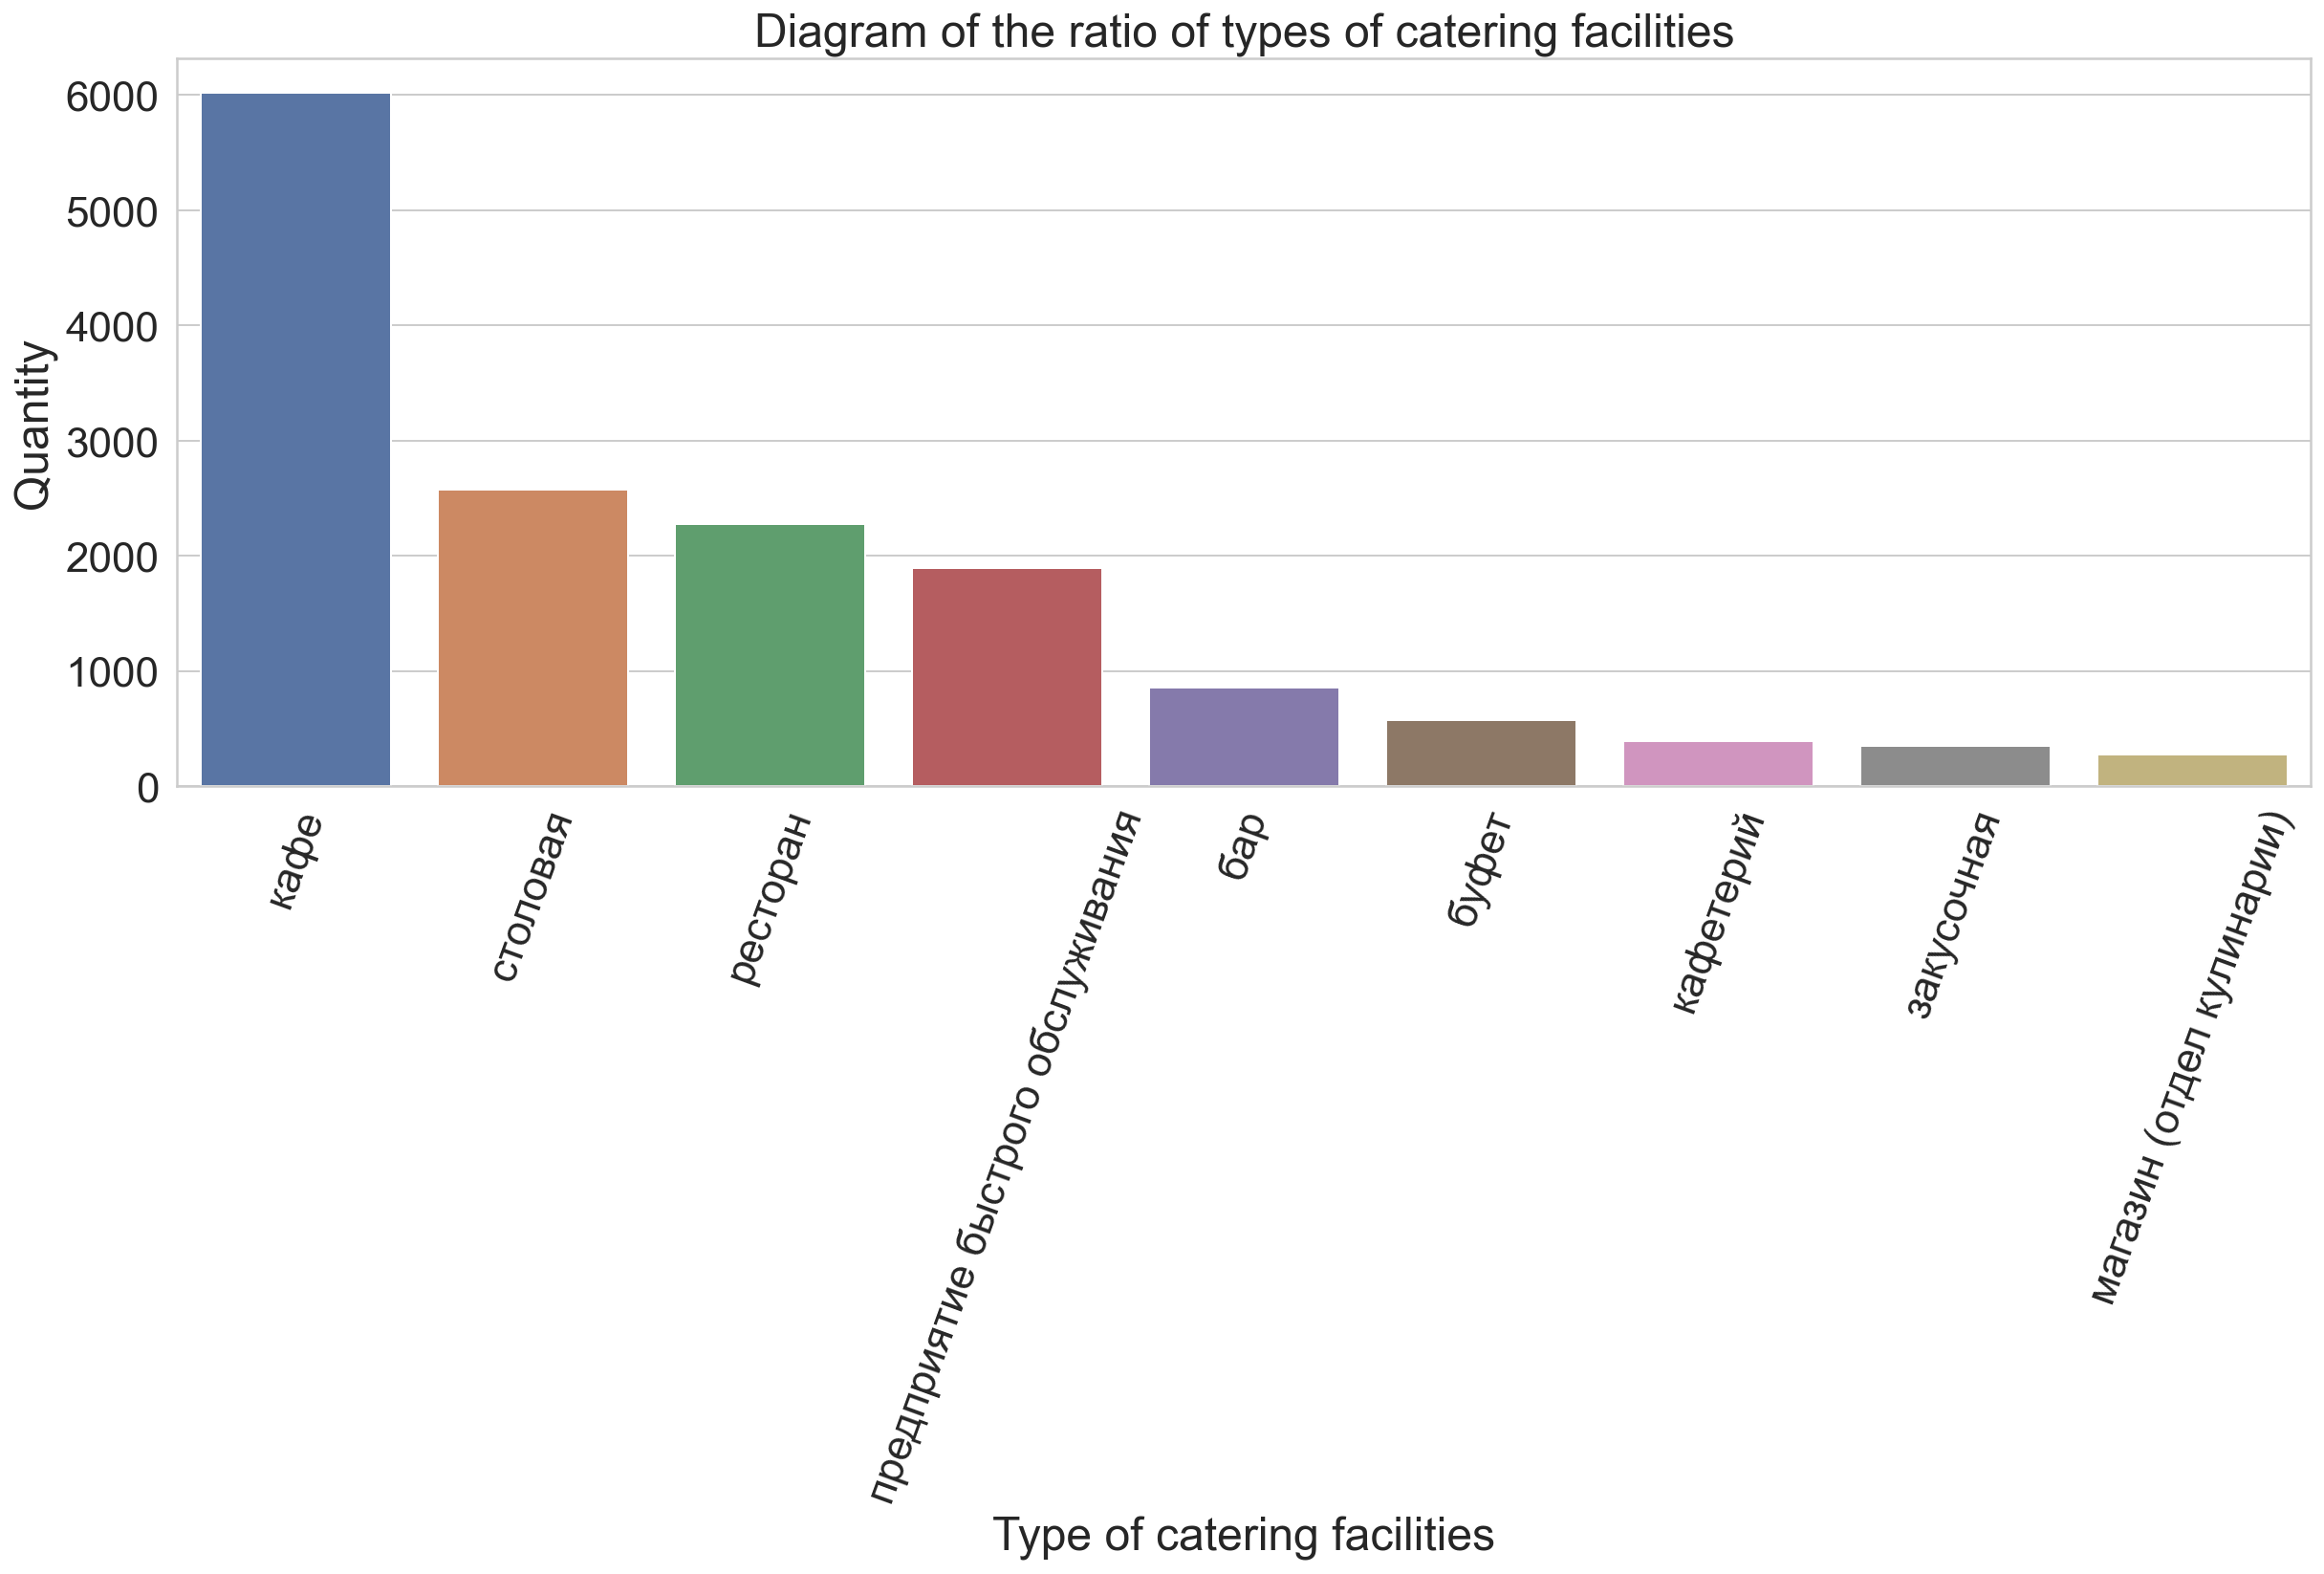

In [14]:
sns.barplot(x='index', y=object_type.object_type, data=object_type) 

plt.ylabel('Quantity')
plt.xlabel('Type of catering facilities')
plt.title('Diagram of the ratio of types of catering facilities')
plt.xticks(rotation=70);

Share of public catering facilities by type

In [15]:
object_type_round = round(rest_data.object_type.value_counts(normalize=True), 3)
object_type_round

кафе                                 0.396
столовая                             0.169
ресторан                             0.150
предприятие быстрого обслуживания    0.124
бар                                  0.056
буфет                                0.038
кафетерий                            0.026
закусочная                           0.023
магазин (отдел кулинарии)            0.018
Name: object_type, dtype: float64

In [16]:
names = [
    'cafe',
    'canteen',
    'snack bar',
    'fast food restaurant',
    'restaurant',
    'cafeteria',
    'buffet',
    'bar',
    'store (culinary department)'
]

fig = px.pie(values=object_type_round, names=names, title='Share of catering establishments')
fig.show()

The most common types of catering facility are cafes (6,099, or 39.7%), canteens (2,587, or 16.8%) and restaurants (2,285, or 14.9%). The least common are stores with a cooking department (273, or 1.8%), snack bars (360, or 2.3%) and cafeterias (398, or 2.6%).

## 2.2. Ratio of chain and non-network establishments by their number

Total number of chain and non-chain restaurants

In [17]:
rest_data.chain.value_counts()

нет    12245
да      2950
Name: chain, dtype: int64

Share of chain and non-chain restaurants in total

In [18]:
round(rest_data.chain.value_counts(normalize=True), 4)

нет    0.8059
да     0.1941
Name: chain, dtype: float64

In [19]:
fig = go.Figure(data=[go.Pie(labels=['no', 'yes'], values=rest_data.chain.value_counts(),
                             title='Share of chain and non-chain restaurants in total')])
fig.show()

Number of chain and non-chain restaurants by type of facility

In [20]:
rest_data.groupby(['object_type', 'chain'])['id'].agg({'count'}) \
         .sort_values(by='count', ascending=False)

count
object_type                       chain       
кафе                              нет     4628
столовая                          нет     2572
ресторан                          нет     1734
кафе                              да      1389
предприятие быстрого обслуживания нет     1107
бар                               нет      816
предприятие быстрого обслуживания да       784
буфет                             нет      560
ресторан                          да       541
кафетерий                         нет      342
закусочная                        нет      292
магазин (отдел кулинарии)         нет      194
                                  да        78
закусочная                        да        56
кафетерий                         да        51
бар                               да        37
буфет                             да        11
столовая                          да         3

Share of chain and non-chain restaurants by type of facility

In [21]:
rest_data.groupby(['object_type', 'chain'])['id'].agg({'count'}) \
         .sort_values(by='count', ascending=False).apply(lambda x:100 * x / float(x.sum()))

count
object_type                       chain           
кафе                              нет    30.457387
столовая                          нет    16.926621
ресторан                          нет    11.411649
кафе                              да      9.141165
предприятие быстрого обслуживания нет     7.285291
бар                               нет     5.370188
предприятие быстрого обслуживания да      5.159592
буфет                             нет     3.685423
ресторан                          да      3.560382
кафетерий                         нет     2.250740
закусочная                        нет     1.921685
магазин (отдел кулинарии)         нет     1.276736
                                  да      0.513327
закусочная                        да      0.368542
кафетерий                         да      0.335637
бар                               да      0.243501
буфет                             да      0.072392
столовая                          да      0.019743

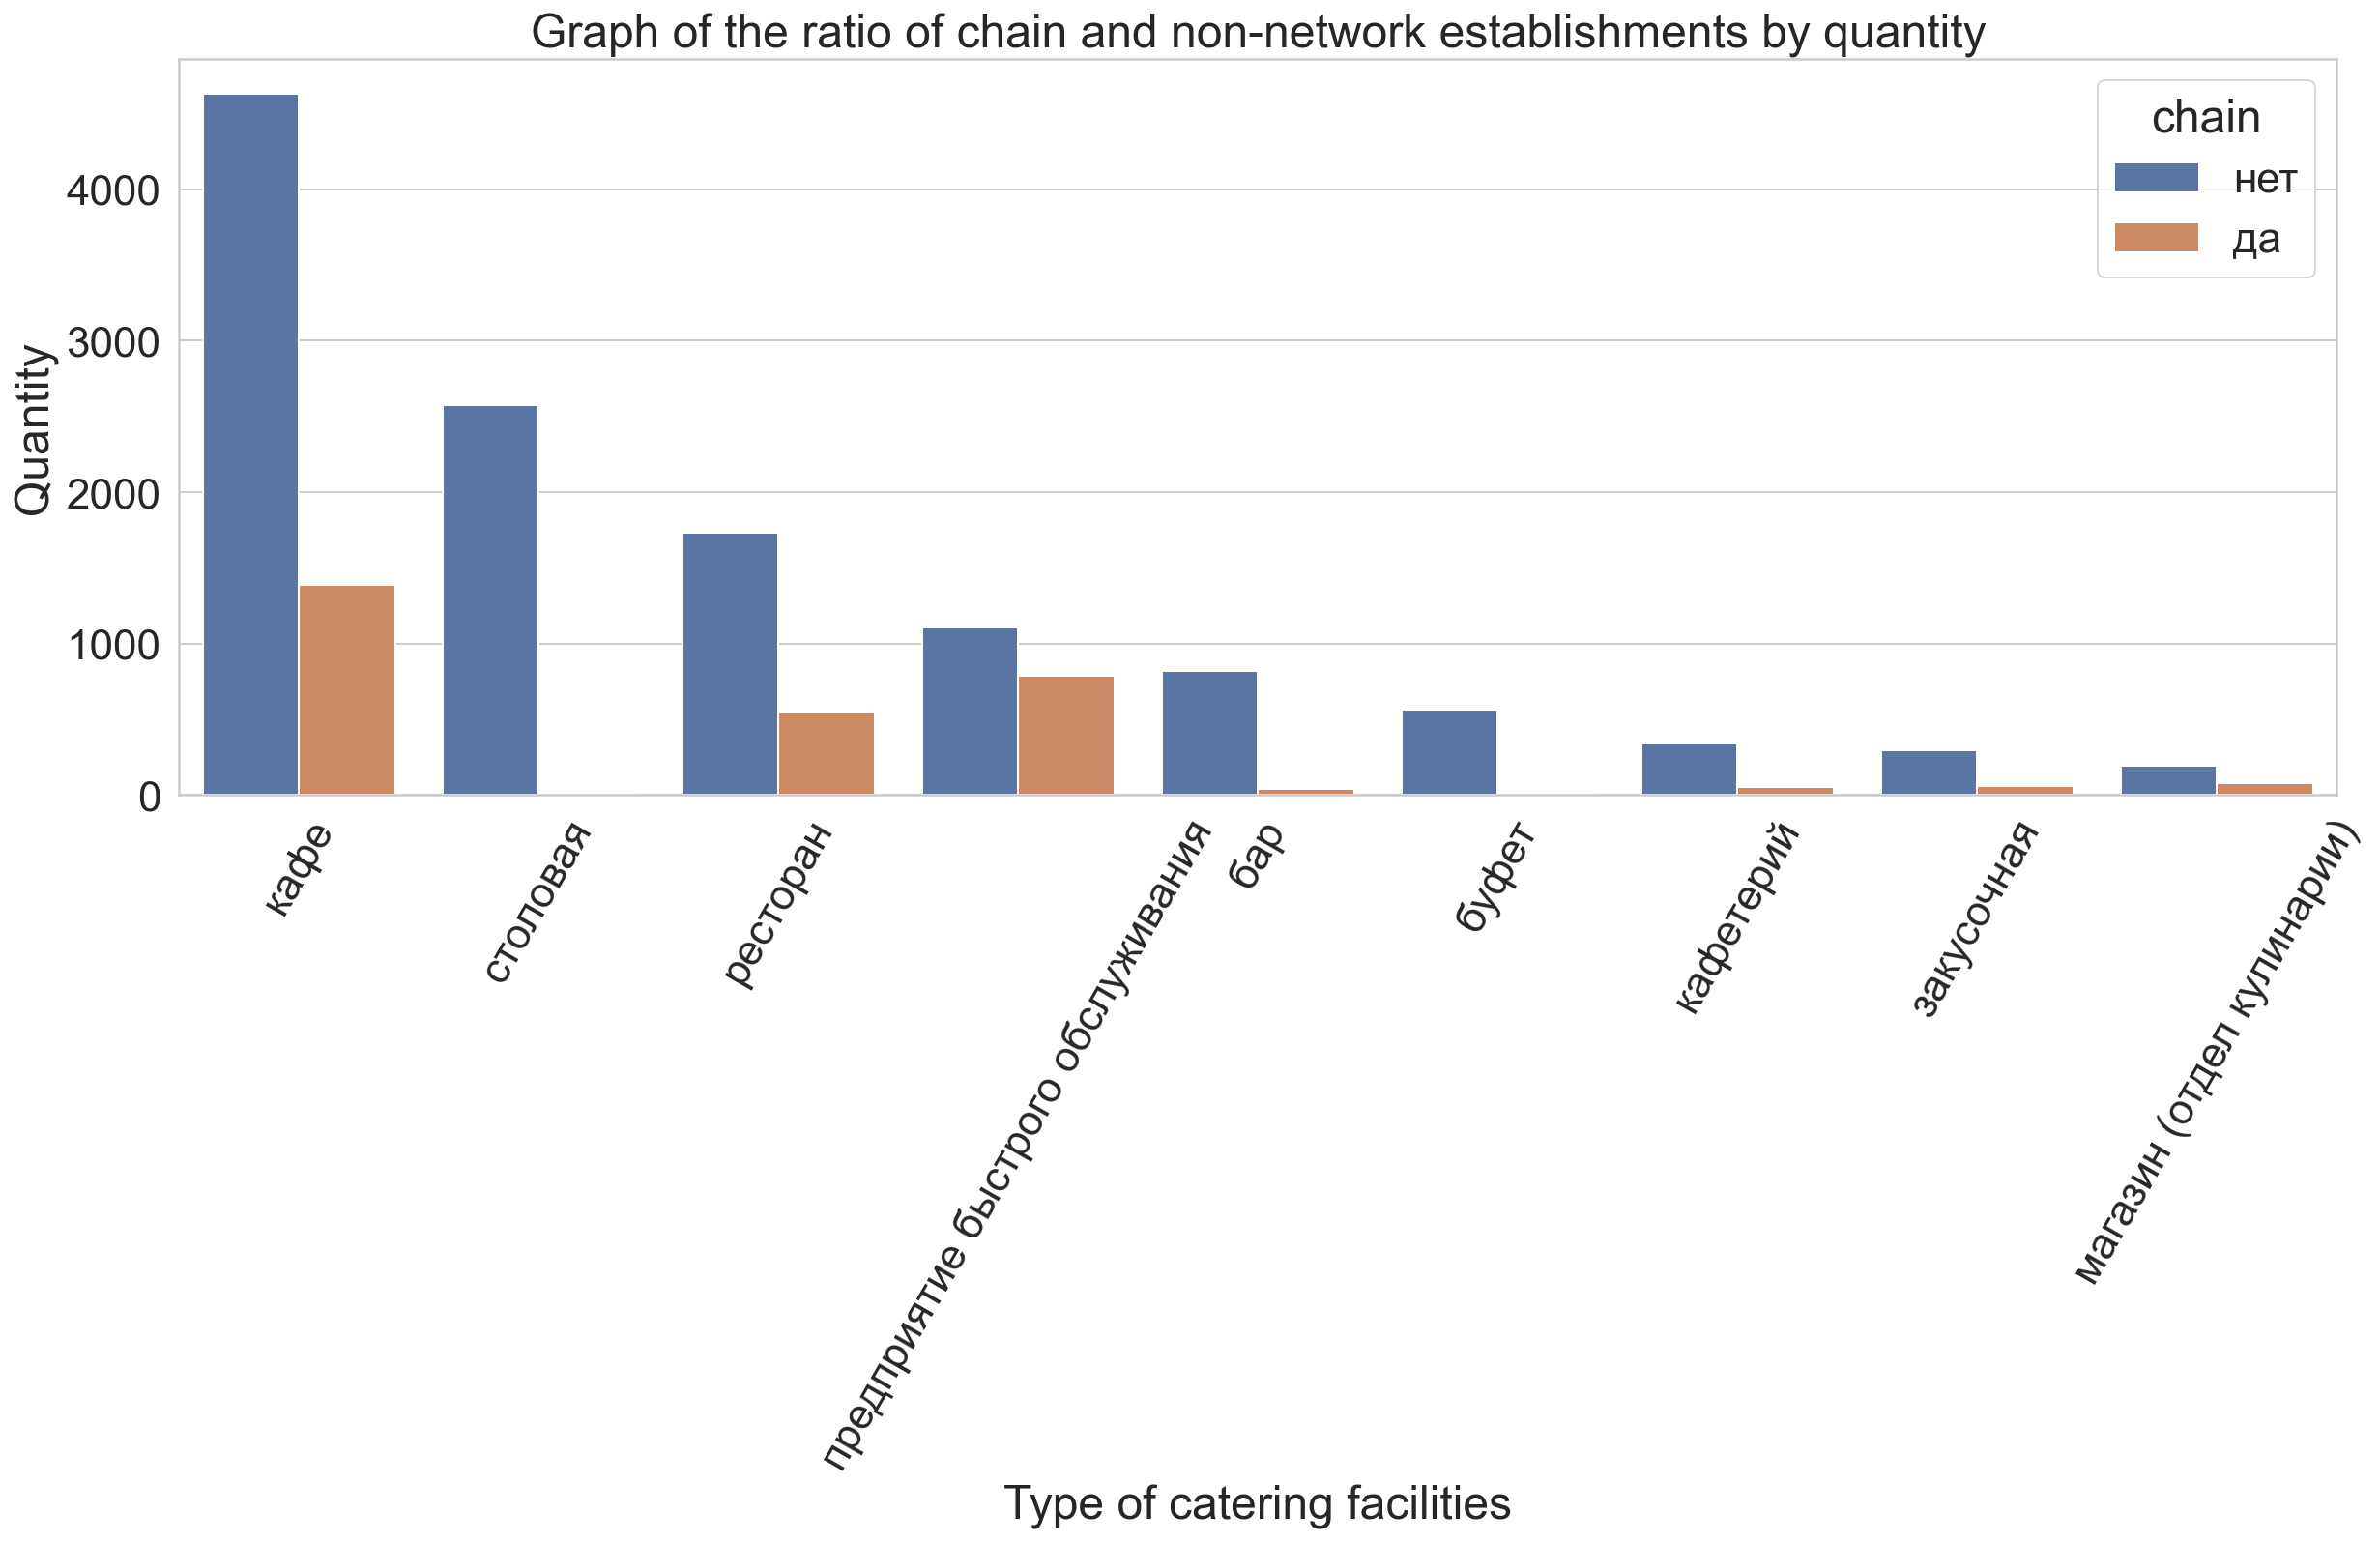

In [27]:
sns.countplot(x="object_type", data=rest_data, hue='chain',  
              order = rest_data['object_type'].value_counts().index)

plt.ylabel('Quantity')
plt.xlabel('Type of catering facilities')
plt.title('Graph of the ratio of chain and non-network establishments by quantity')
plt.xticks(rotation=60);

Out of 15,366 facilities, 2,968 or 19.32% are chain facilities. The most popular among non-network and chain facilities are cafes (30.61% and 9.085% of all facilities, respectively). Restaurants and fast food outlets take the 3rd and 4th places among non-network facilities (11.33% and 7.37% of all facilities, respectively). And canteens, being the second most popular among non-network facilities (16.82% of all facilities), are the last among chain facilities (0.02%).

## 2.3. Type of catering facility characterized by network distribution

Number of chain catering facilities by type

In [29]:
chain = rest_data.query('chain == "да"').object_type.value_counts().reset_index()
chain

index  object_type
0                               кафе         1389
1  предприятие быстрого обслуживания          784
2                           ресторан          541
3          магазин (отдел кулинарии)           78
4                         закусочная           56
5                          кафетерий           51
6                                бар           37
7                              буфет           11
8                           столовая            3

Share of chain catering facilities by type (only chain facilities are taken into account)

In [30]:
round(rest_data.query('chain == "да"').object_type.value_counts(normalize=True), 3)

кафе                                 0.471
предприятие быстрого обслуживания    0.266
ресторан                             0.183
магазин (отдел кулинарии)            0.026
закусочная                           0.019
кафетерий                            0.017
бар                                  0.013
буфет                                0.004
столовая                             0.001
Name: object_type, dtype: float64

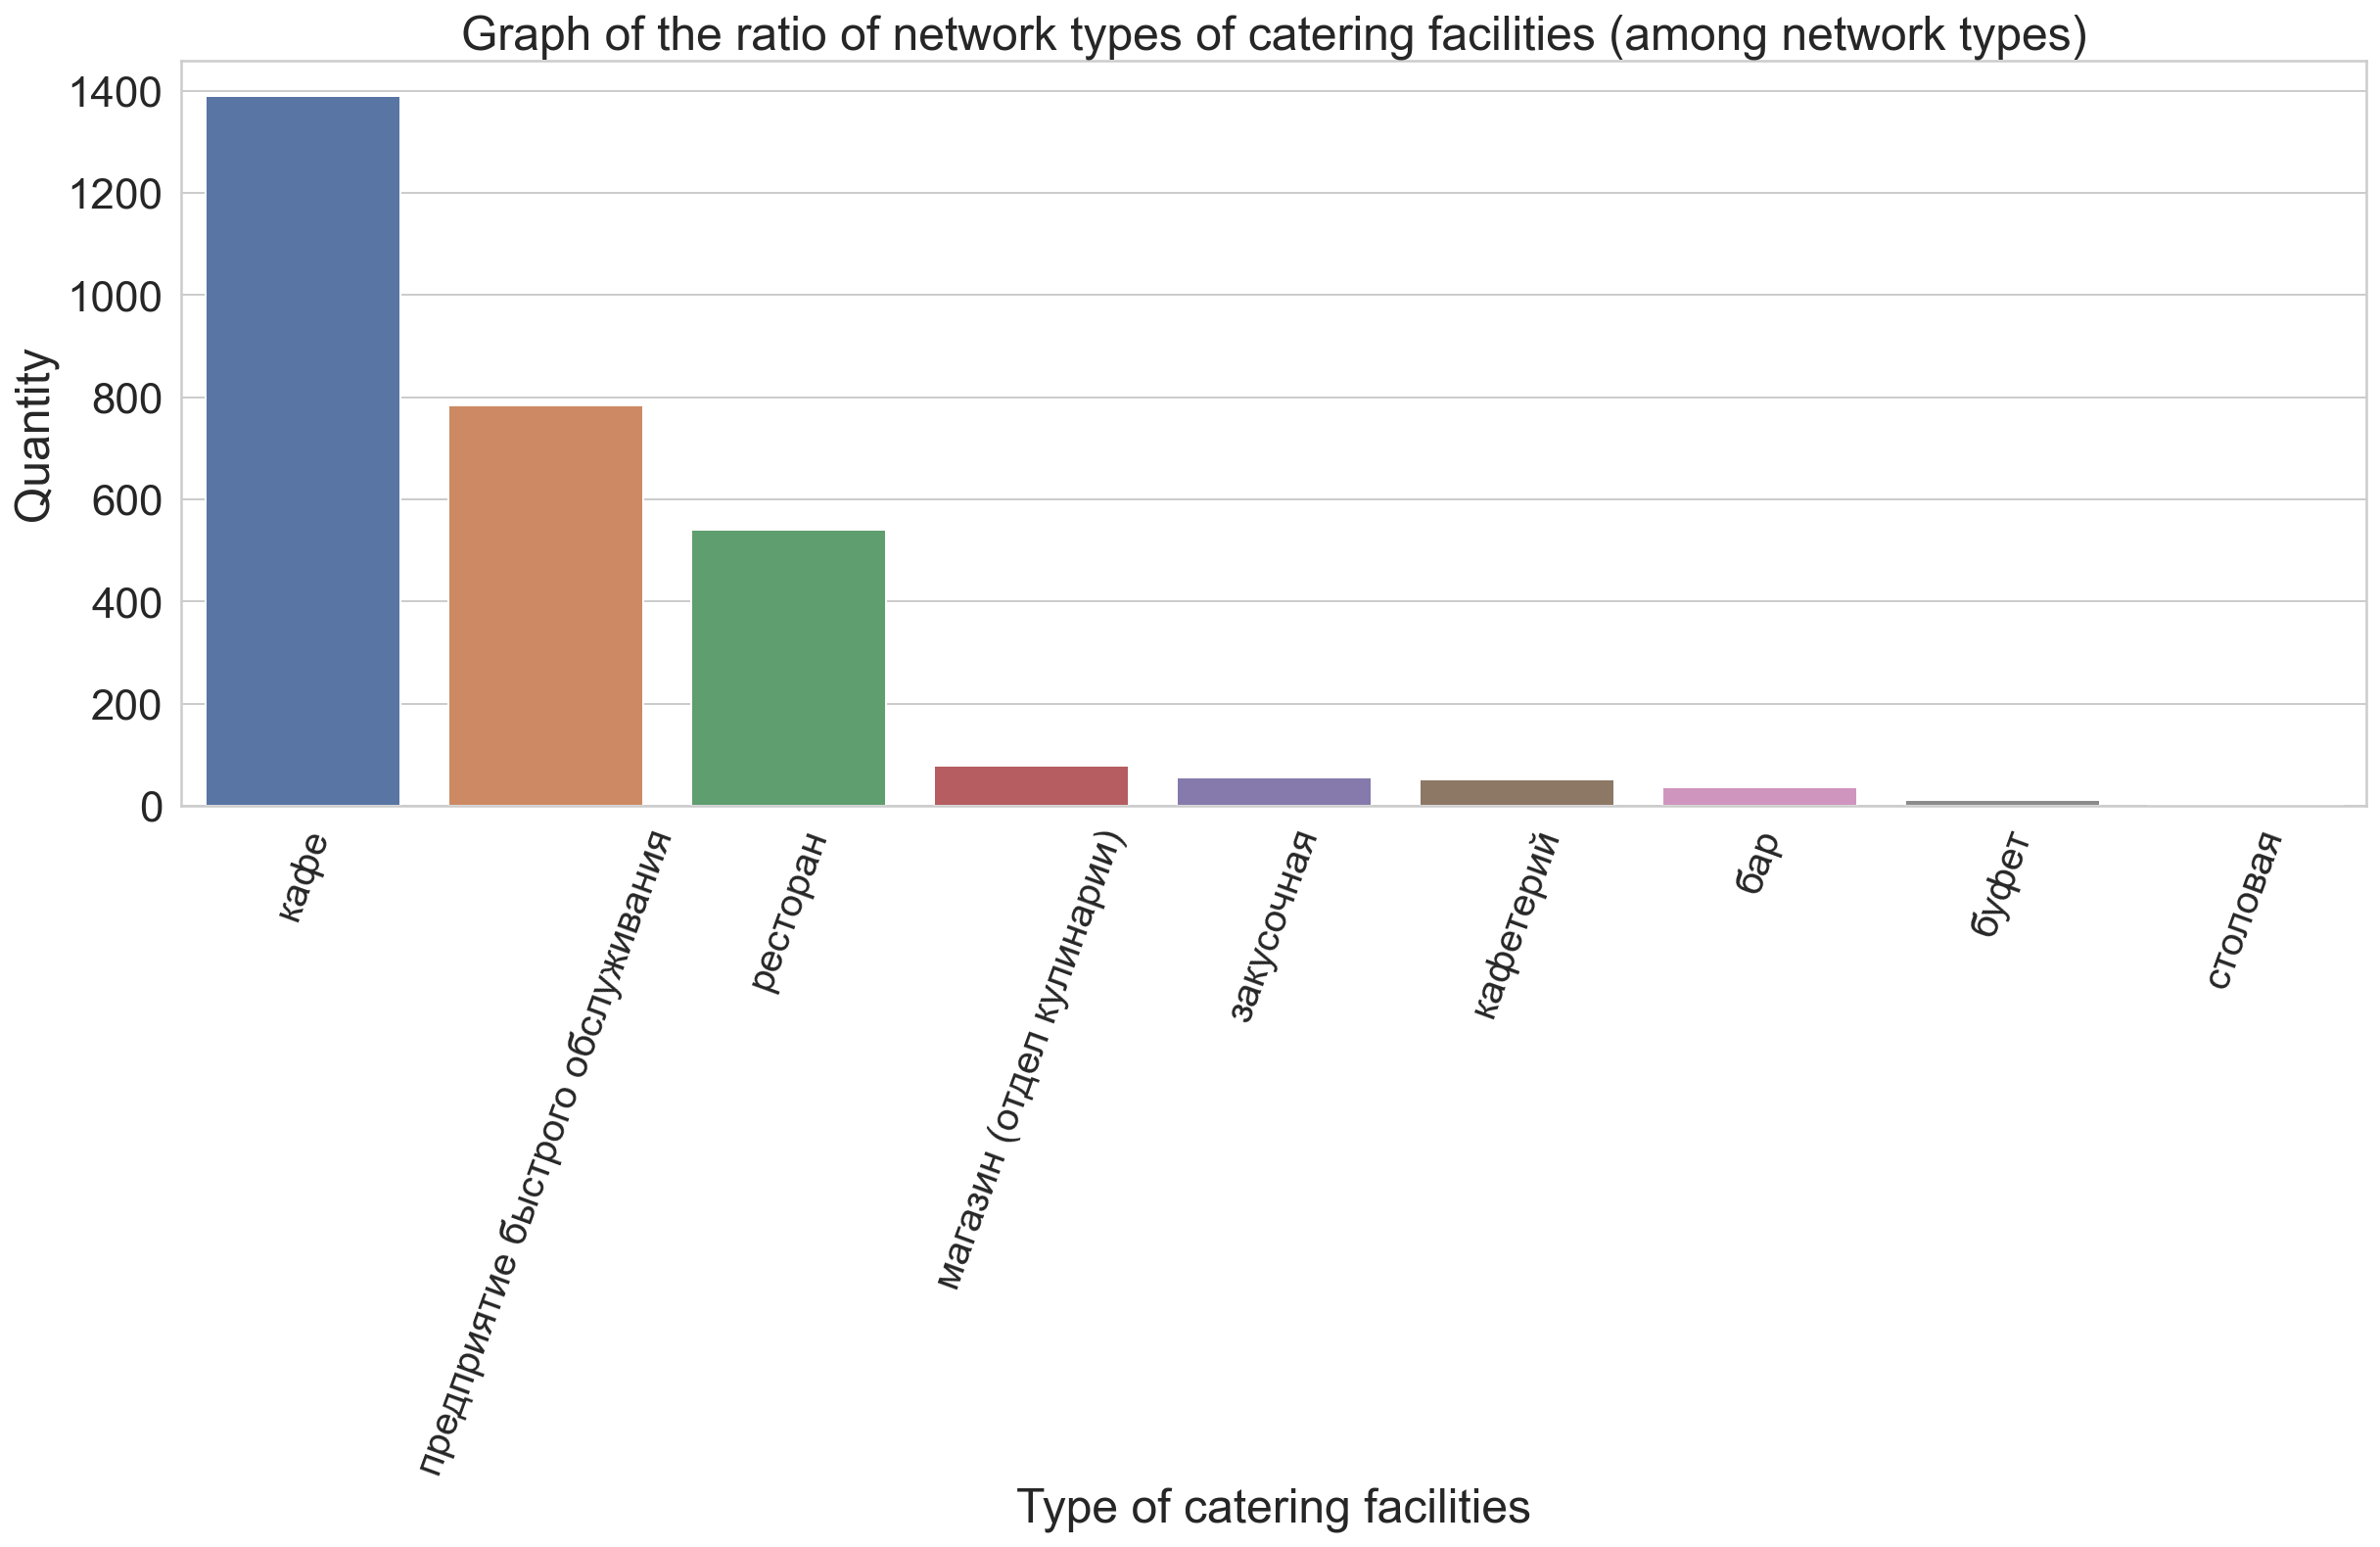

In [32]:
sns.barplot(x='index', y=chain.object_type, data=chain) 

plt.ylabel('Quantity')
plt.xlabel('Type of catering facilities')
plt.title('Graph of the ratio of network types of catering facilities (among network types)')
plt.tick_params(axis='x', labelsize=20)
plt.xticks(rotation=70);

Share of chain catering facilities in the number of chain and non-network facilities by type

In [33]:
chain_from_all = (rest_data.query('chain == "да"').object_type.value_counts() / rest_data.object_type.value_counts()) \
                                 .sort_values(ascending=False).reset_index()
chain_from_all

index  object_type
0  предприятие быстрого обслуживания     0.414595
1          магазин (отдел кулинарии)     0.286765
2                           ресторан     0.237802
3                               кафе     0.230846
4                         закусочная     0.160920
5                          кафетерий     0.129771
6                                бар     0.043376
7                              буфет     0.019264
8                           столовая     0.001165

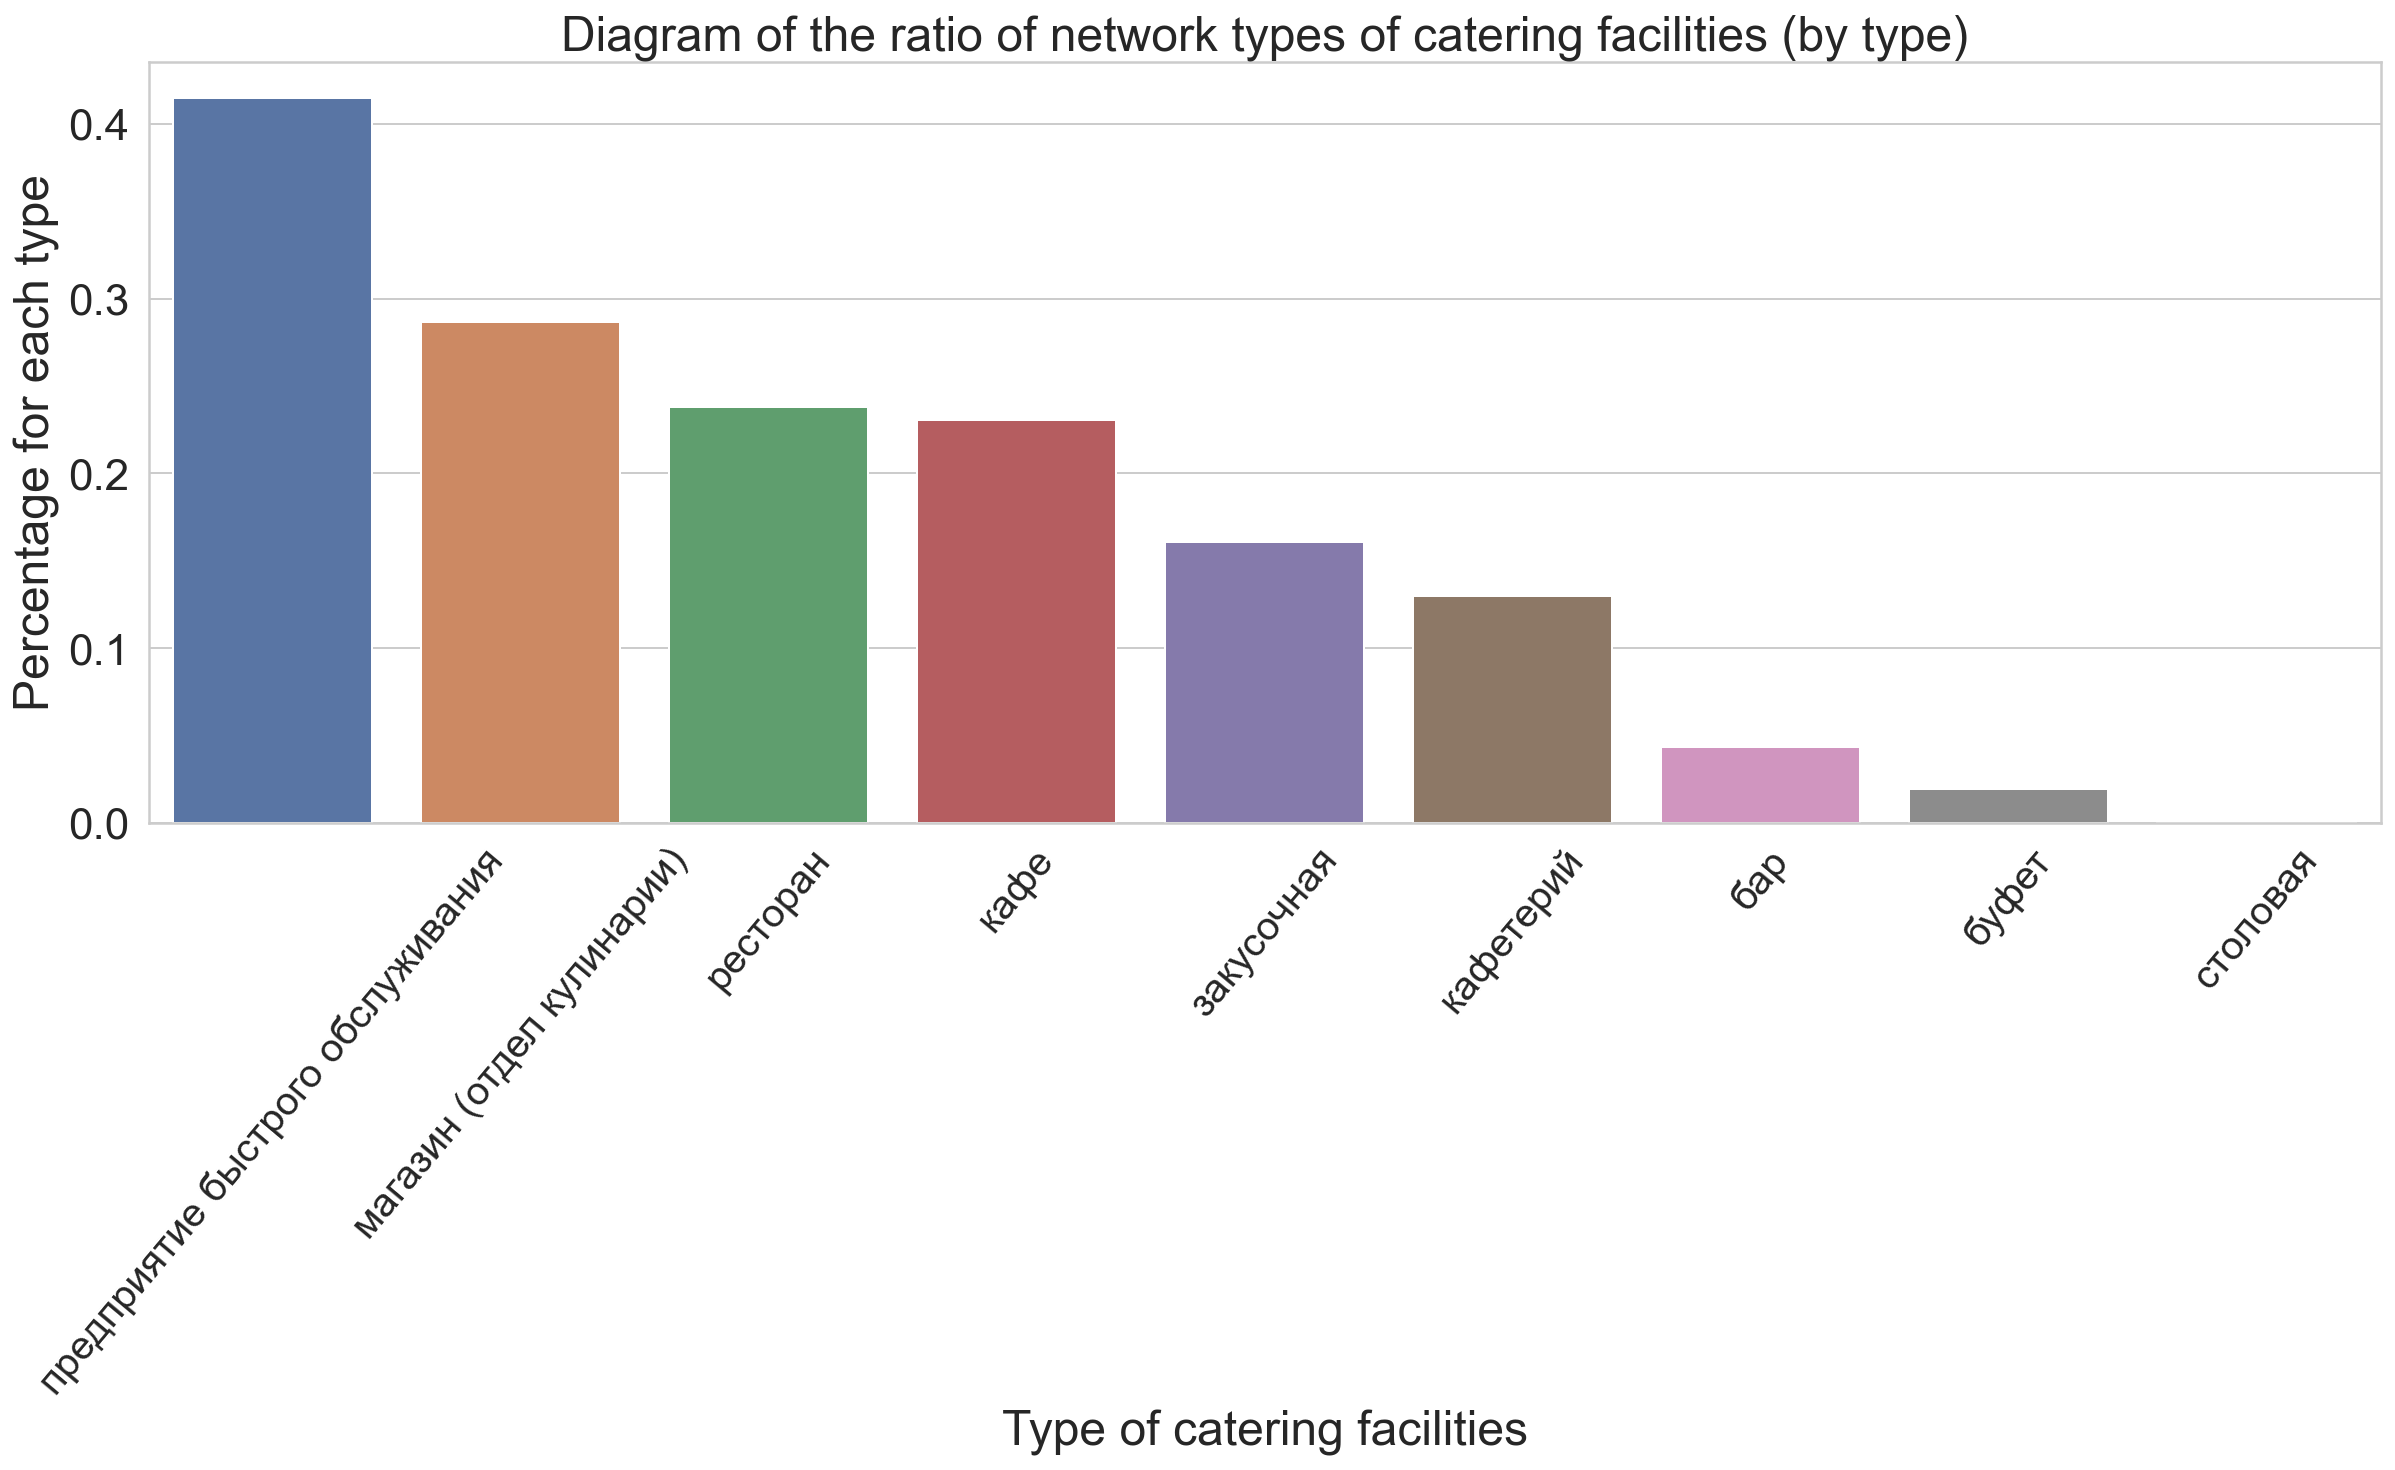

In [34]:
sns.barplot(x='index', y=chain_from_all.object_type, data=chain_from_all) 

plt.ylabel('Percentage for each type')
plt.xlabel('Type of catering facilities')
plt.title('Diagram of the ratio of network types of catering facilities (by type)')
plt.tick_params(axis='x', labelsize=20)
plt.xticks(rotation=50);

Cafes (1,396, or 47% of chain facilities), fast food outlets (791, or 26.7%) and restaurants (544, or 18.3%) are more likely than other types of facilities to have a chain distribution in absolute terms.

But the largest share among the chain facilities in relative terms is occupied by fast food outlets. Of the 1,923 chain and non-network fast food outlets, 791, or 41%, are chain. Stores with cooking departments account for 29%, restaurants - 24%, cafes - 23%.

## 2.4. What is characteristic of chain establishments: many establishments with a small number of seats each or few establishments with a large number of seats?

Seating statistics for all establishments

In [35]:
rest_data.number.describe()

count    15195.000000
mean        59.899638
std         74.957109
min          0.000000
25%         14.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

Seating statistics for chain establishments

In [36]:
rest_data[rest_data.chain == "да"].number.describe()

count    2950.000000
mean       53.009153
std        57.214495
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

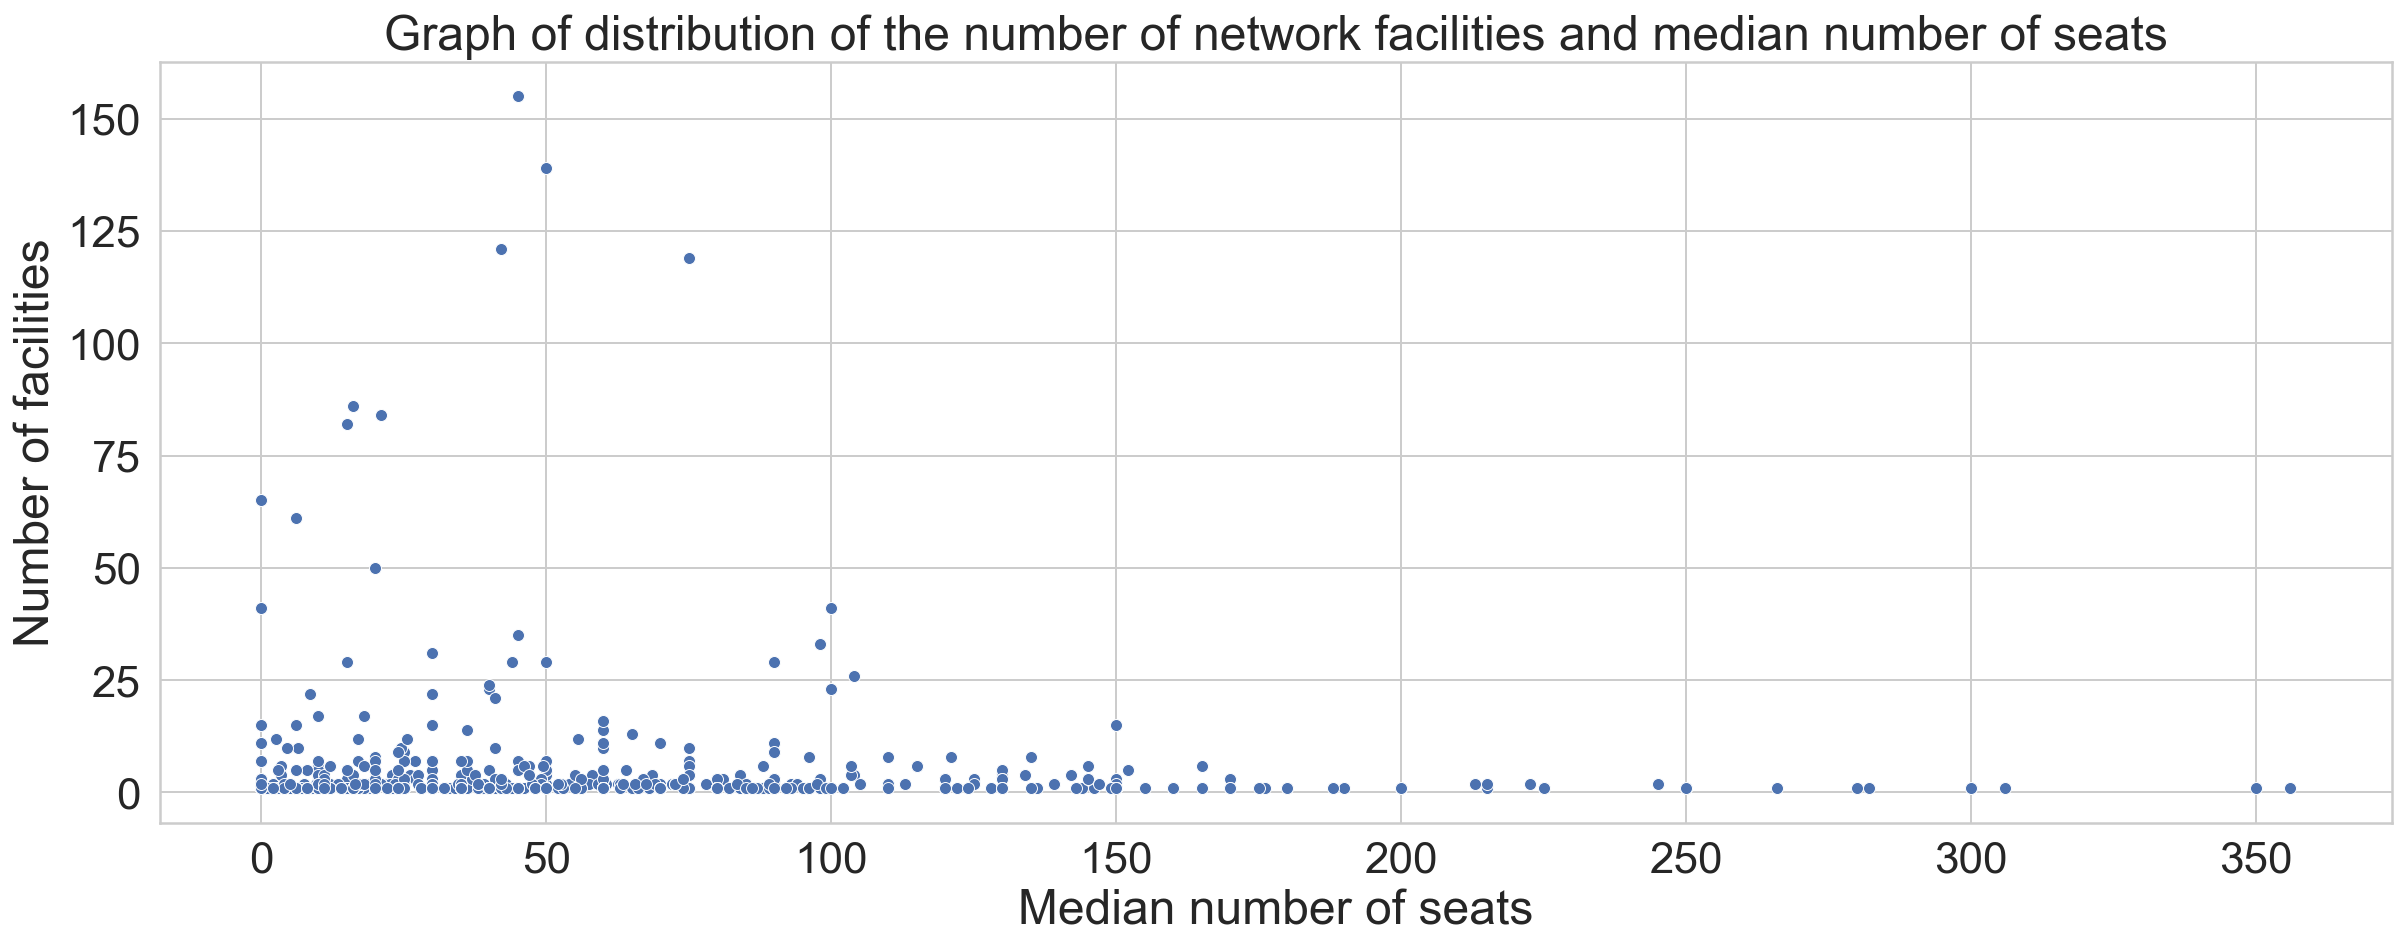

In [37]:
chain_median = rest_data[rest_data['chain']=='да'].groupby('object_name') \
                                                  .agg({'object_name':'count', 'number':'median'})
chain_median.columns = ['objects', 'median_number']

sns.scatterplot(data = chain_median, x = "median_number", y = "objects")
plt.ylabel('Number of facilities')
plt.xlabel('Median number of seats')
plt.title('Graph of distribution of the number of network facilities and median number of seats');

The number of seats, in general, varies from 0 to 1,700. The average number is 59.55 seats.

The chart shows that chain facilities are characterized by few establishments with a large number of seats.

## 2.5. Types of catering facility that provide the largest number of seats on average

Average number of seats

In [38]:
number_mean = rest_data.groupby('object_type').agg({'number': 'mean'}) \
                       .sort_values(by='number', ascending=False).reset_index()
number_mean

object_type      number
0                           столовая  130.367767
1                           ресторан   97.047473
2                              буфет   51.572680
3                                бар   43.602579
4                               кафе   39.875187
5  предприятие быстрого обслуживания   20.786885
6                          кафетерий    9.221374
7                         закусочная    7.663793
8          магазин (отдел кулинарии)    5.610294

In [39]:
rest_data.groupby('object_type').agg({'number': 'median'}) \
                       .sort_values(by='number', ascending=False).reset_index()

object_type  number
0                           столовая     103
1                           ресторан      80
2                                бар      35
3                              буфет      32
4                               кафе      32
5                          кафетерий       6
6  предприятие быстрого обслуживания       6
7                         закусочная       0
8          магазин (отдел кулинарии)       0

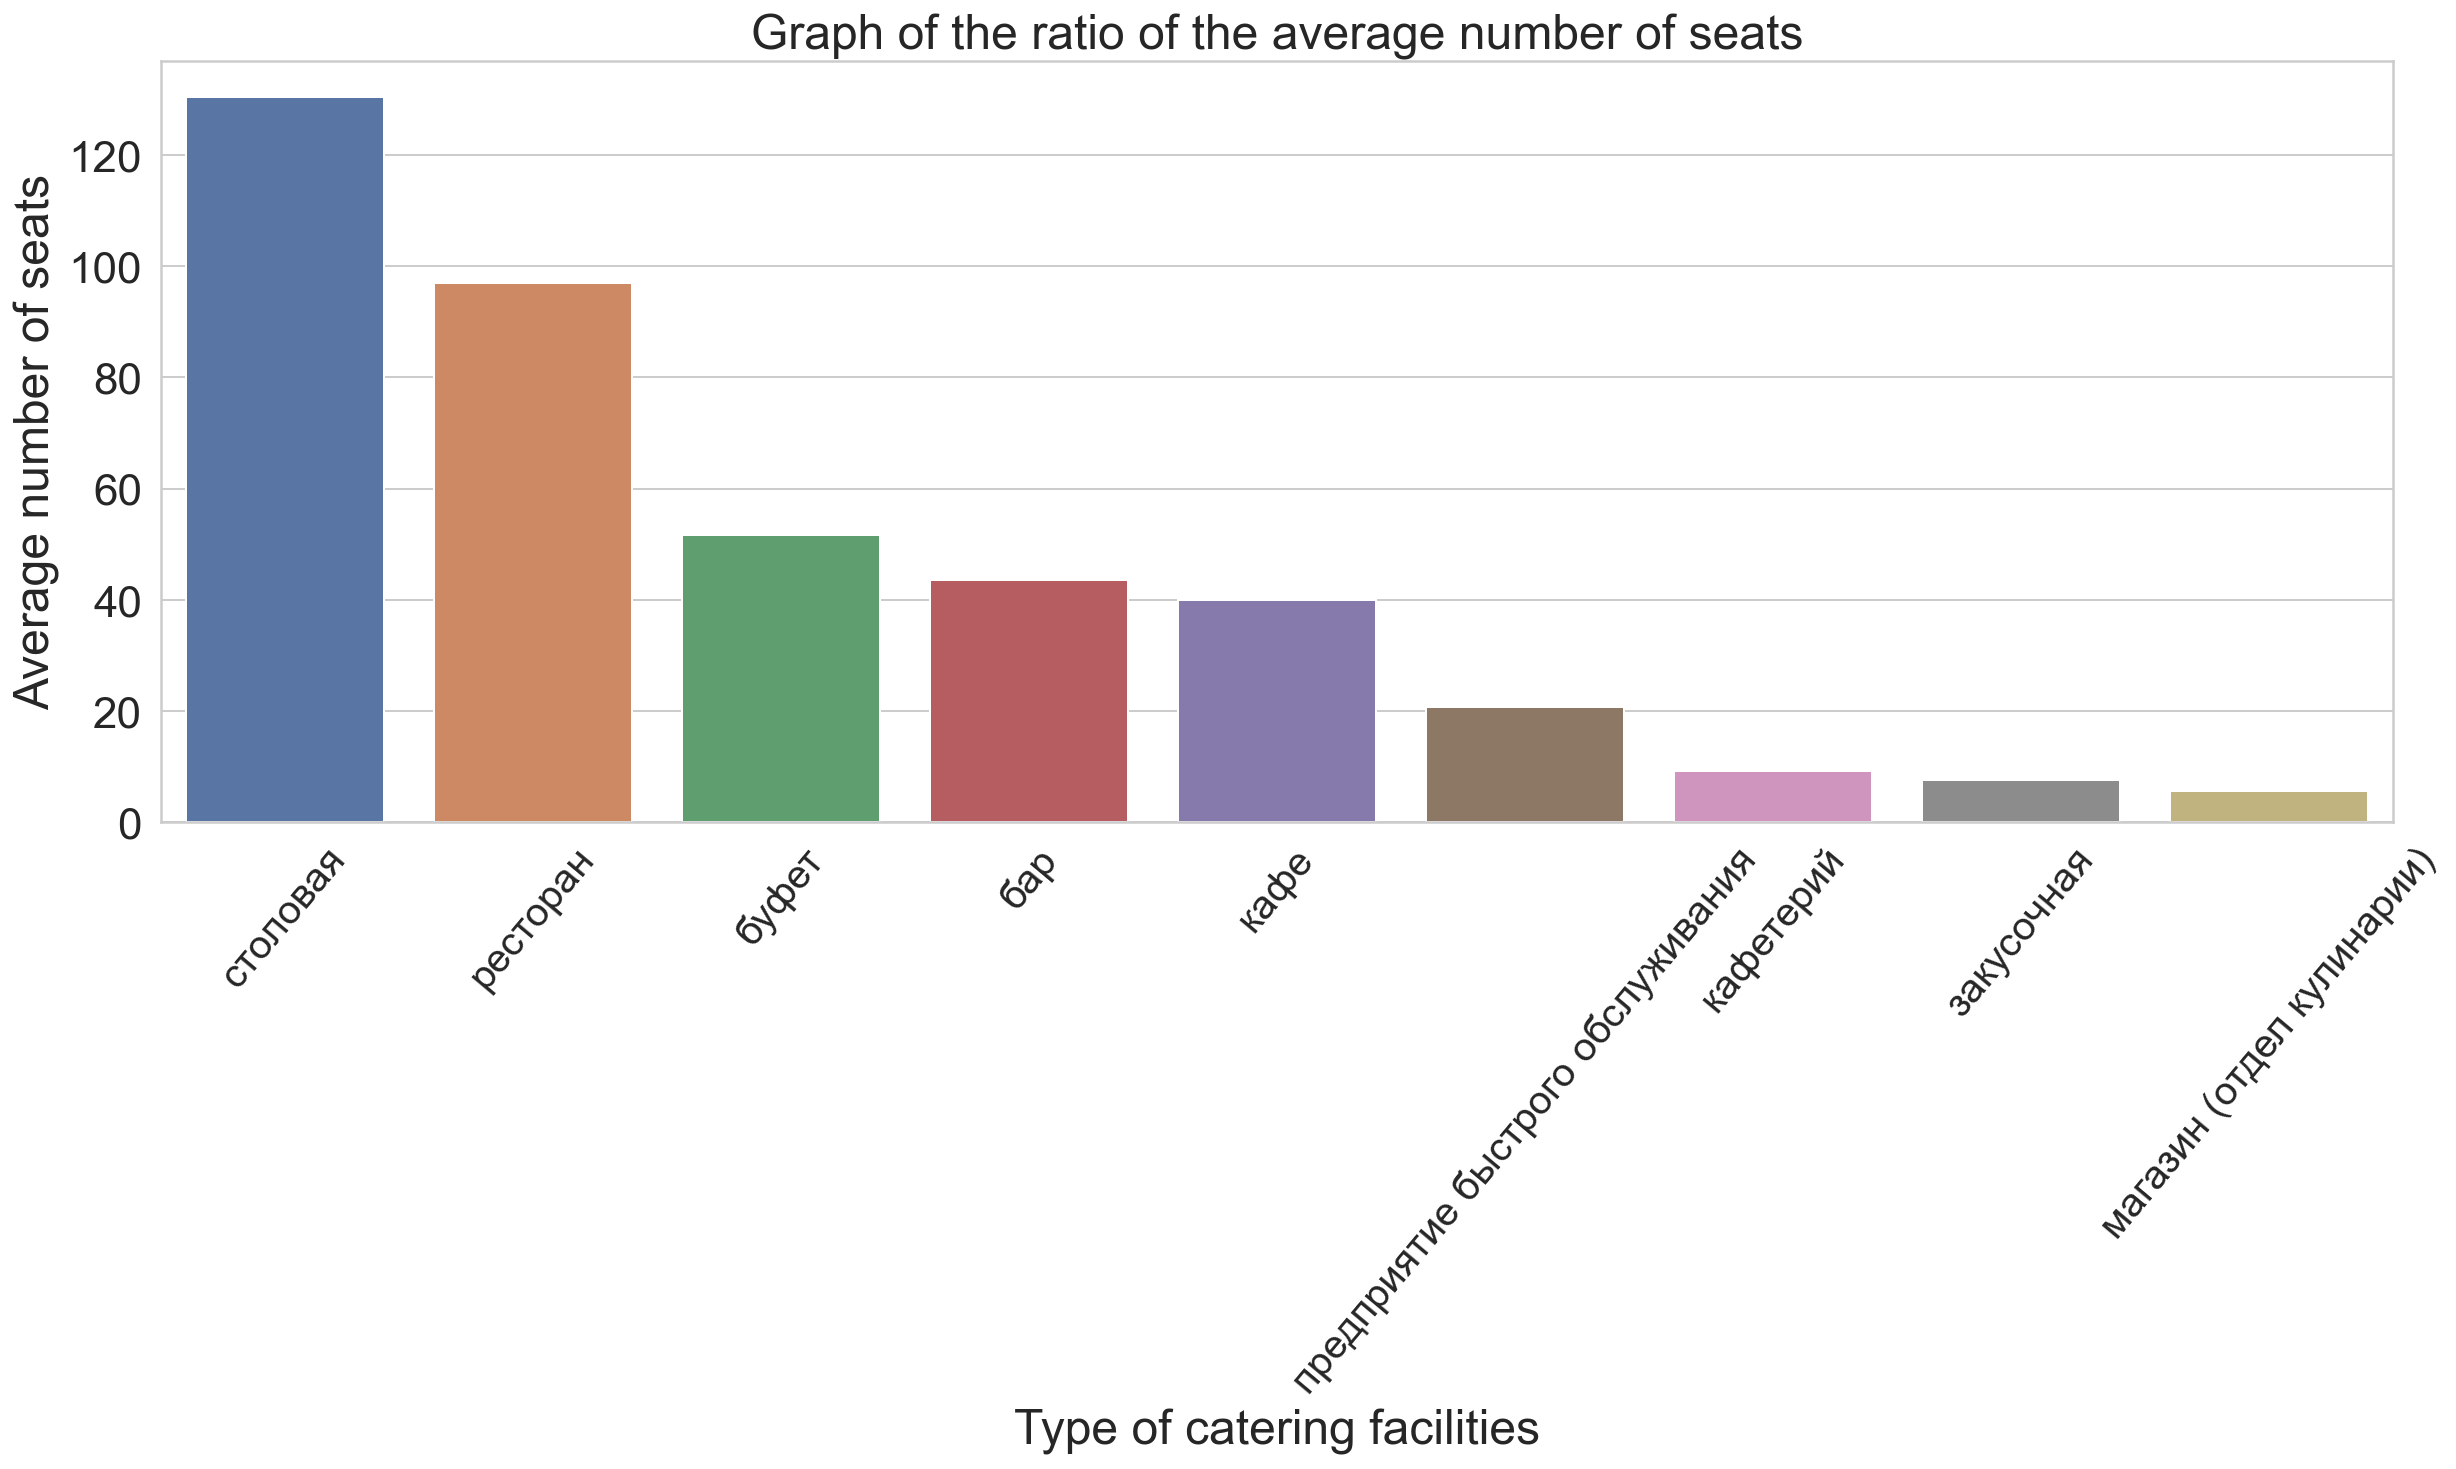

In [40]:
sns.barplot(x=number_mean.object_type, y=number_mean.number, data=number_mean) 

plt.ylabel('Average number of seats')
plt.xlabel('Type of catering facilities')
plt.title('Graph of the ratio of the average number of seats')
plt.tick_params(axis='x', labelsize=20)
plt.xticks(rotation=50);

On average, the largest number of seats is provided by:

* canteens - 130.25
* restaurants - 96.83
* buffets - 51.12
* bars - 43.49
* cafes - 39.71

The least - stores of the cooking department - 5.59 and snack bars - 7.61.

## 2.6. Allocating street information from the address column to a separate column

Table with addresses that do not contain the word "Moscow"

In [41]:
rest_data_check = rest_data[~rest_data["address"].str.contains('Москва')]
rest_data_check.shape

(71, 6)

Create a street column by the first part of the row before the comma of the address column and view the unique values of the column

In [42]:
warnings.filterwarnings("ignore")

rest_data_check['street'] = rest_data_check["address"].str.split(', ').str[0]
rest_data_check.street.unique()

array(['Партизанская улица', 'Поречная улица', '1-й Нагатинский проезд',
       'Софийская набережная', 'Нижний Таганский тупик',
       'Николоямская улица', 'улица Каманина', 'Погодинская улица',
       'Большая Бронная улица', '2-я Брестская улица',
       'Профсоюзная улица', 'Калашный переулок', 'Солянский тупик',
       'улица Земляной Вал', 'Таганская площадь', 'проезд Добролюбова',
       'улица Обручева', 'Вспольный переулок', 'улица Ленинская Слобода',
       'Дербеневская улица', 'Проектируемый проезд N 5231',
       'Ленинский проспект', 'Новоданиловская набережная',
       '5-й Котельнический переулок', 'улица Знаменка', 'Школьная улица',
       'поселение Сосенское', 'Полевая улица', 'поселение Марушкинское',
       'поселение Михайлово-Ярцевское', 'город Московский',
       'Митинская улица', 'Чертановская улица', 'Варшавское шоссе',
       'улица Миклухо-Маклая', '1-я Тверская-Ямская улица',
       'Краснобогатырская улица', 'город Троицк', 'Медынская улица',
       'Та

Create a table with addresses that contain the word "settlement" and "city" from the previous table

In [43]:
searchfor = ['город', 'поселение']
rest_data1 = rest_data_check[rest_data_check["address"].str.contains('|'.join(searchfor))]
pd.set_option('max_colwidth', 100) 
rest_data1

id         object_name chain                        object_type  \
8798   149897            Столовая   нет                           столовая   
8803   153478       Кафе «У Гены»   нет                               кафе   
8805   147848                Лачи   нет                           ресторан   
8806   155099           Плов-Сити   нет                               кафе   
8807   155107            Хатимаки   нет                               кафе   
8817   148031         Бургер Кинг    да  предприятие быстрого обслуживания   
9137   162646  Кафе «Мастер Ланч»   нет                          кафетерий   
14849  208239        ГАЗПРОМНЕФТЬ   нет                               кафе   

                                                                  address  \
8798                         поселение Сосенское, деревня Столбово, дом 1   
8803                   поселение Марушкинское, деревня Давыдково, дом 101   
8805   поселение Михайлово-Ярцевское, деревня Сенькино-Секерино, дом 154А   
8806                город Московский, Солнечная улица, дом 3А, строение 1   
8807                город Московский, Солнечная улица, дом 3А, строение 1   
8817                              город Московский, улица Хабарова, дом 2   
9137                  город Троицк, 42-й километр Калужского шоссе, дом 8   
14849                 поселение "Мосрентген", деревня Дудкино, владение 1   

       number                         street  
8798       24            поселение Сосенское  
8803       40         поселение Марушкинское  
8805       60  поселение Михайлово-Ярцевское  
8806       20               город Московский  
8807       18               город Московский  
8817        0               город Московский  
9137       23                   город Троицк  
14849      20         поселение "Мосрентген"

Creating a street column by the second part of the row after the comma of the address column

In [44]:
warnings.filterwarnings("ignore")

rest_data1['street'] = (rest_data1.address.str.split(', ').str[1]) 
rest_data1

id         object_name chain                        object_type  \
8798   149897            Столовая   нет                           столовая   
8803   153478       Кафе «У Гены»   нет                               кафе   
8805   147848                Лачи   нет                           ресторан   
8806   155099           Плов-Сити   нет                               кафе   
8807   155107            Хатимаки   нет                               кафе   
8817   148031         Бургер Кинг    да  предприятие быстрого обслуживания   
9137   162646  Кафе «Мастер Ланч»   нет                          кафетерий   
14849  208239        ГАЗПРОМНЕФТЬ   нет                               кафе   

                                                                  address  \
8798                         поселение Сосенское, деревня Столбово, дом 1   
8803                   поселение Марушкинское, деревня Давыдково, дом 101   
8805   поселение Михайлово-Ярцевское, деревня Сенькино-Секерино, дом 154А   
8806                город Московский, Солнечная улица, дом 3А, строение 1   
8807                город Московский, Солнечная улица, дом 3А, строение 1   
8817                              город Московский, улица Хабарова, дом 2   
9137                  город Троицк, 42-й километр Калужского шоссе, дом 8   
14849                 поселение "Мосрентген", деревня Дудкино, владение 1   

       number                          street  
8798       24                деревня Столбово  
8803       40               деревня Давыдково  
8805       60       деревня Сенькино-Секерино  
8806       20                 Солнечная улица  
8807       18                 Солнечная улица  
8817        0                  улица Хабарова  
9137       23  42-й километр Калужского шоссе  
14849      20                 деревня Дудкино

Creating a table with addresses that do not contain the word "settlement" and "city" from the rest_data_check table

In [45]:
rest_data2 = rest_data[~rest_data["address"].str.contains('Москва')]
searchfor = ['город', 'поселение']
rest_data2 = rest_data_check[~rest_data_check["address"].str.contains('|'.join(searchfor))]
rest_data2.head()

id                object_name chain object_type  \
856    23601      Буфет - ГБОУ СОШ № 64   нет       буфет   
857    23604            Буфет - ГБОУ 60   нет       буфет   
1487   25349  Ресторан «Гранатовый сад»   нет    ресторан   
7620  132359          Кафе «La Carotte»   нет        кафе   
7756   28214        Роснефть (закрытое)   нет    столовая   

                                         address  number  \
856                   Партизанская улица, дом 30     100   
857                   Партизанская улица, дом 30     100   
1487        Поречная улица, дом 5/14, строение 1      40   
7620              1-й Нагатинский проезд, дом 10     198   
7756  Софийская набережная, дом 26/1, строение 1      80   

                      street  
856       Партизанская улица  
857       Партизанская улица  
1487          Поречная улица  
7620  1-й Нагатинский проезд  
7756    Софийская набережная

Creating a *street* column by the first part of the row up to the comma of the *address* column

In [46]:
warnings.filterwarnings("ignore")

rest_data2['street'] = (rest_data2.address.str.split(', ').str[0]) 
rest_data2.head()

id                object_name chain object_type  \
856    23601      Буфет - ГБОУ СОШ № 64   нет       буфет   
857    23604            Буфет - ГБОУ 60   нет       буфет   
1487   25349  Ресторан «Гранатовый сад»   нет    ресторан   
7620  132359          Кафе «La Carotte»   нет        кафе   
7756   28214        Роснефть (закрытое)   нет    столовая   

                                         address  number  \
856                   Партизанская улица, дом 30     100   
857                   Партизанская улица, дом 30     100   
1487        Поречная улица, дом 5/14, строение 1      40   
7620              1-й Нагатинский проезд, дом 10     198   
7756  Софийская набережная, дом 26/1, строение 1      80   

                      street  
856       Партизанская улица  
857       Партизанская улица  
1487          Поречная улица  
7620  1-й Нагатинский проезд  
7756    Софийская набережная

Creating a table with addresses that contain the word "Moscow"

In [48]:
rest_data3 = rest_data[rest_data["address"].str.contains('Москва')]
rest_data3.shape

(15124, 6)

Creating a *street* column by the second part of the row after the comma of the *address* column

In [49]:
warnings.filterwarnings("ignore")

rest_data3['street'] = rest_data3["address"].str.split(', ').str[1]
rest_data3.head()

id             object_name chain object_type  \
0  151635                 СМЕТАНА   нет        кафе   
1   77874                  Родник   нет        кафе   
2   24309         Кафе «Академия»   нет        кафе   
3   21894              ПИЦЦЕТОРИЯ    да        кафе   
4  119365  Кафе «Вишневая метель»   нет        кафе   

                                             address  number  \
0         город Москва, улица Егора Абакумова, дом 9      48   
1  город Москва, улица Талалихина, дом 2/1, корпус 1      35   
2          город Москва, Абельмановская улица, дом 6      95   
3            город Москва, Абрамцевская улица, дом 1      40   
4  город Москва, Абрамцевская улица, дом 9, корпус 1      50   

                  street  
0  улица Егора Абакумова  
1       улица Талалихина  
2   Абельмановская улица  
3     Абрамцевская улица  
4     Абрамцевская улица

Merging tables

In [50]:
rest_data_with_street = pd.concat([rest_data1, rest_data2, rest_data3])
rest_data_with_street.head(10)

id            object_name chain                        object_type  \
8798   149897               Столовая   нет                           столовая   
8803   153478          Кафе «У Гены»   нет                               кафе   
8805   147848                   Лачи   нет                           ресторан   
8806   155099              Плов-Сити   нет                               кафе   
8807   155107               Хатимаки   нет                               кафе   
8817   148031            Бургер Кинг    да  предприятие быстрого обслуживания   
9137   162646     Кафе «Мастер Ланч»   нет                          кафетерий   
14849  208239           ГАЗПРОМНЕФТЬ   нет                               кафе   
856     23601  Буфет - ГБОУ СОШ № 64   нет                              буфет   
857     23604        Буфет - ГБОУ 60   нет                              буфет   

                                                                  address  \
8798                         поселение Сосенское, деревня Столбово, дом 1   
8803                   поселение Марушкинское, деревня Давыдково, дом 101   
8805   поселение Михайлово-Ярцевское, деревня Сенькино-Секерино, дом 154А   
8806                город Московский, Солнечная улица, дом 3А, строение 1   
8807                город Московский, Солнечная улица, дом 3А, строение 1   
8817                              город Московский, улица Хабарова, дом 2   
9137                  город Троицк, 42-й километр Калужского шоссе, дом 8   
14849                 поселение "Мосрентген", деревня Дудкино, владение 1   
856                                            Партизанская улица, дом 30   
857                                            Партизанская улица, дом 30   

       number                          street  
8798       24                деревня Столбово  
8803       40               деревня Давыдково  
8805       60       деревня Сенькино-Секерино  
8806       20                 Солнечная улица  
8807       18                 Солнечная улица  
8817        0                  улица Хабарова  
9137       23  42-й километр Калужского шоссе  
14849      20                 деревня Дудкино  
856       100              Партизанская улица  
857       100              Партизанская улица

Comparing the number of rows in the original and new table to check if the merge is correct

In [51]:
display(rest_data.shape)
rest_data_with_street.shape

(15195, 6)

(15195, 7)

In the description to the table it is stated that catering facilities are located in Moscow. The table identified 71 facilities that lacked the word "Moscow" in the column with addresses. Sampling analysis showed that the addresses are Moscow, but either only streets and house numbers are given, or the names of settlements and cities Troitsk and Moskovskiy (which are part of Moscow).

For further work on the table, a column with street names without house numbers and settlements was created. In several rows of the table instead of the street name there is an indication of the village and house number, as there is no street.

## 2.7. Top 10 streets by number of food service facilities. Districts in which the streets are located.

Top streets by number of objects

In [52]:
street_top10 = rest_data_with_street.groupby('street').agg({'id': 'count'}) \
                       .sort_values(by='id', ascending=False).reset_index().head(12)
street_top10

street   id
0         город Зеленоград  230
1            проспект Мира  197
2        Профсоюзная улица  181
3   Ленинградский проспект  172
4   Пресненская набережная  165
5         Варшавское шоссе  161
6       Ленинский проспект  148
7      поселение Сосенское  137
8     проспект Вернадского  127
9     Кутузовский проспект  114
10         Каширское шоссе  110
11    Кировоградская улица  107

The city of Zelenograd and Sosenskoye settlement were found in the column, so two more streets were added.

The most common streets in the city of Zelenograd

In [53]:
rest_data_with_street[rest_data_with_street['street'].str.contains('город Зеленоград')] \
                                                     .address.value_counts().head(10)

город Москва, город Зеленоград, Крюковская площадь, дом 1            10
город Москва, город Зеленоград, Панфиловский проспект, дом 6А         7
город Москва, город Зеленоград, площадь Юности, дом 2, строение 1     7
город Москва, город Зеленоград, улица Гоголя, дом 2                   4
город Москва, город Зеленоград, корпус 317А, строение 1               4
город Москва, город Зеленоград, корпус 124, строение 1                3
город Москва, город Зеленоград, Савёлкинский проезд, дом 4            3
город Москва, город Зеленоград, корпус 2309А                          3
город Москва, город Зеленоград, корпус 1805                           3
город Москва, город Зеленоград, Яблоневая аллея, дом 2                3
Name: address, dtype: int64

Most common streets in Sosenskoye settlement

In [54]:
rest_data_with_street[rest_data_with_street['street'].str.contains('поселение Сосенское')] \
                                                     .address.value_counts().head(10)

город Москва, поселение Сосенское, Калужское шоссе, 22-й километр, дом 10                              38
город Москва, поселение Сосенское, ж/к "Дубровка", Сосновая улица, дом 15                               6
город Москва, поселение Сосенское, посёлок Коммунарка, улица Липовый Парк, дом 5, корпус 1              4
город Москва, поселение Сосенское, посёлок Коммунарка, улица Александры Монаховой, дом 98, корпус 1     4
город Москва, поселение Сосенское, посёлок Коммунарка, улица Александры Монаховой, дом 96, корпус 2     4
город Москва, поселение Сосенское, посёлок Коммунарка, улица Липовый Парк, дом 11                       4
город Москва, поселение Сосенское, посёлок Коммунарка, улица Липовый Парк, дом 8, корпус 2              3
город Москва, поселение Сосенское, посёлок Коммунарка, улица Александры Монаховой, дом 92, корпус 1     3
город Москва, поселение Сосенское, Николо-Хованская улица, дом 28, строение 5                           2
город Москва, поселение Сосенское, деревня Сос

**None of the streets could potentially be included in the top 10, so the city of Zelenograd and Sosenskoye settlement can be removed from the top 10.**

Removal of Zelenograd and Sosenskoye from the top 10

In [55]:
street_top10 = street_top10.drop(street_top10.index[[0, 7]])
street_top10

street   id
1            проспект Мира  197
2        Профсоюзная улица  181
3   Ленинградский проспект  172
4   Пресненская набережная  165
5         Варшавское шоссе  161
6       Ленинский проспект  148
8     проспект Вернадского  127
9     Кутузовский проспект  114
10         Каширское шоссе  110
11    Кировоградская улица  107

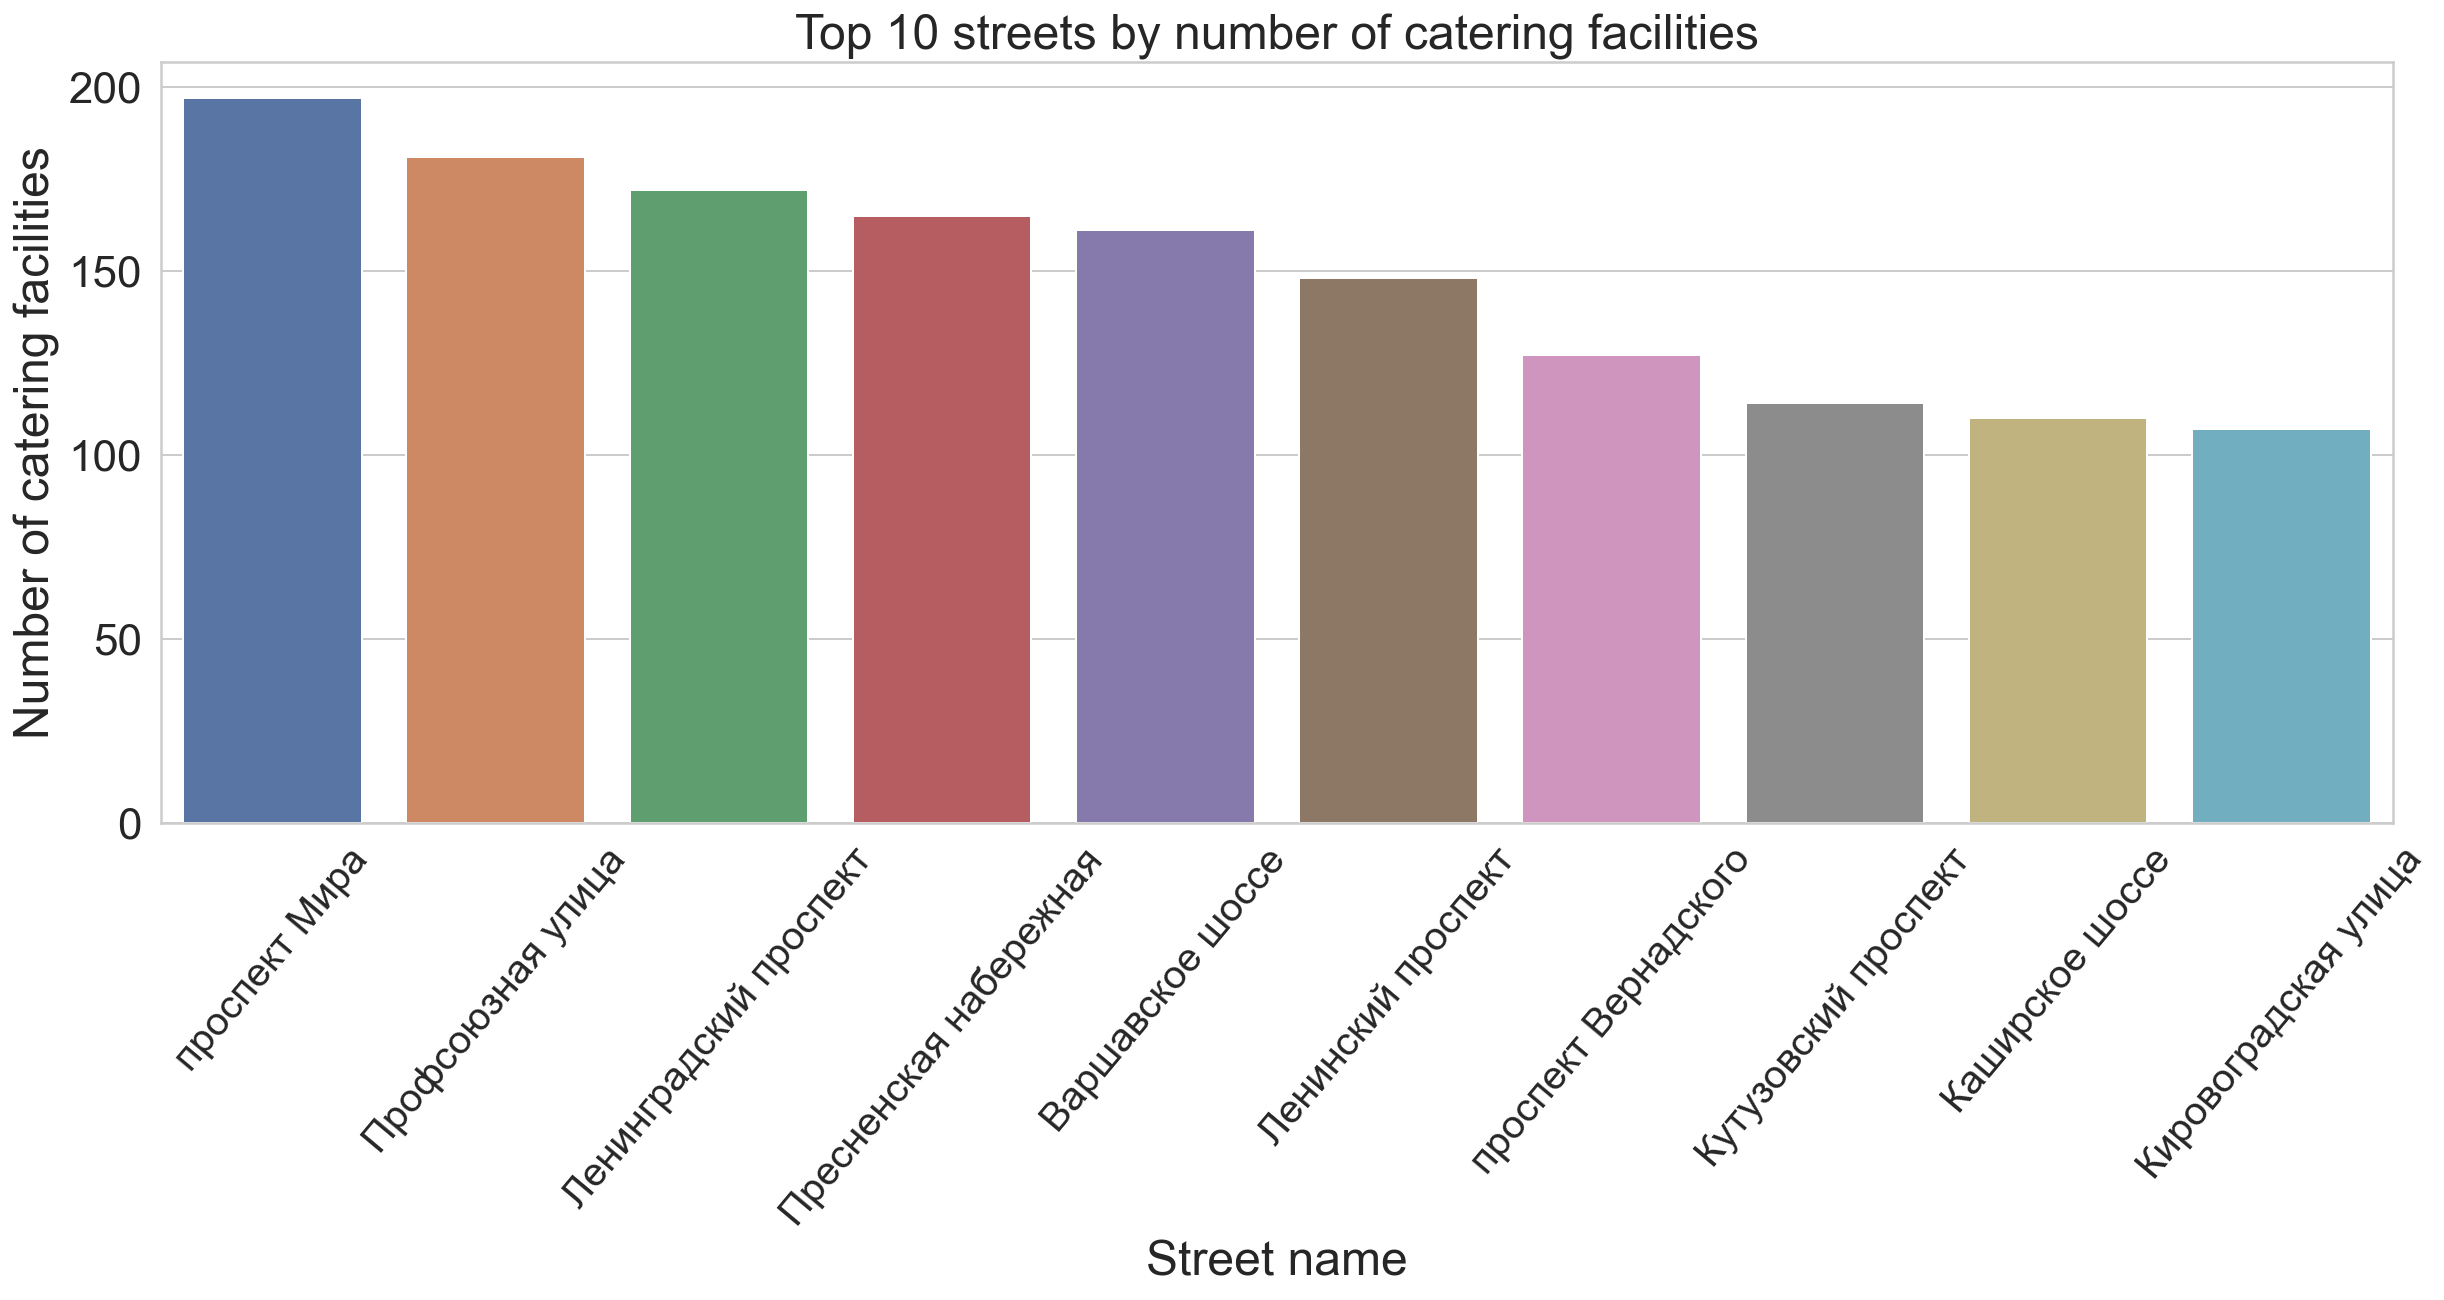

In [56]:
sns.barplot(x=street_top10.street, y=street_top10.id, data=street_top10) 

plt.ylabel('Number of catering facilities')
plt.xlabel('Street name')
plt.title('Top 10 streets by number of catering facilities')
plt.tick_params(axis='x', labelsize=20)
plt.xticks(rotation=50);

Adding a table with streets and districts from Google drive

In [57]:
url = 'https://docs.google.com/spreadsheets/d/1sIgzDzMcC-0J9Z6jNJ14XQggqcb1JAX3/edit?usp=sharing'
url.split('/')
id = url.split('/')[5]
district = pd.read_csv(f'https://docs.google.com/spreadsheets/d/{id}/export?format=csv')
district.head()

streetname  areaid okrug         area
0             Выставочный переулок      17   ЦАО  Пресненский
1                     улица Гашека      17   ЦАО  Пресненский
2          Большая Никитская улица      17   ЦАО  Пресненский
3                Глубокий переулок      17   ЦАО  Пресненский
4  Большой Гнездниковский переулок      17   ЦАО  Пресненский

Removing an unnecessary column and renaming columns

In [58]:
district = district.drop(columns='areaid')
district.columns = ['street', 'okrug', 'area']

Combining tables to identify streets with districts and neighborhoods

In [59]:
areas_top10 = street_top10.merge(district, on='street', how='left')
areas_top10.head()

street   id okrug               area
0  проспект Мира  197  СВАО       Алексеевский
1  проспект Мира  197  СВАО  Ярославский Район
2  проспект Мира  197  СВАО       Марьина роща
3  проспект Мира  197  СВАО       Останкинский
4  проспект Мира  197  СВАО          Ростокино

Number of districts encountered

In [60]:
areas_top10.area.value_counts()

Тропарево-Никулино           2
Чертаново Южное              2
Донской                      2
Теплый Стан                  2
Чертаново Центральное        2
Чертаново Северное           2
Гагаринский                  2
Нагатино-Садовники           2
Ломоносовский                2
Обручевский                  2
Проспект Вернадского         2
Северное Бутово              1
Хорошевский                  1
Якиманка                     1
Москворечье-Сабурово         1
Алексеевский                 1
Орехово-Борисово Южное       1
Марьина роща                 1
Аэропорт                     1
Останкинский                 1
Академический                1
Ясенево                      1
Черемушки                    1
Пресненский                  1
Беговой                      1
Фили-Давыдково               1
Сокол                        1
Ростокино                    1
Коньково                     1
Орехово-Борисово Северное    1
Ярославский Район            1
Нагорный                     1
Свиблово

In [61]:
areas_top10.area.value_counts().shape

(37,)

Number of counties encountered

In [62]:
areas_top10.okrug.value_counts()

ЮЗАО    14
ЮАО     14
ЗАО      7
СВАО     6
САО      4
ЦАО      3
Name: okrug, dtype: int64

Top 10 streets by the number of catering facilities:

* Prospekt Mira
* Profsoyuznaya Street
* Leningradsky Prospekt
* Presnenskaya Embankment
* Varshavskoe highway
* Leninsky Prospekt
* Prospekt Vernadskogo
* Kutuzovsky Prospekt
* Kashirskoye highway
* Kirovogradskaya street

The number of objects on one street varies from 110 to 204. For all of these streets there were found districts. The number of districts in which the street is located is from 1 to 8.

The same street can be located in different districts and even districts. Most often in South-West Administrative District and South Administrative District, least often in Central Administrative District. The top 10 streets are located in 37 districts. In 11 districts streets from the top 10 list are found 2 times, in all other districts - 1 time each.

## 2.8. Number of streets with one catering facility. Moscow districts where these streets are located.

Creating a table with streets with 1 catering facility

In [63]:
streets = rest_data_with_street.groupby('street').agg({'id': 'count'}) \
                       .sort_values(by='id', ascending=False).reset_index()
street_1object = streets.loc[streets.id == 1].drop_duplicates(subset=['street'])
street_1object.shape

(547, 2)

Combining tables to identify streets with districts and neighborhoods

In [64]:
street_1object_merged = street_1object.merge(district, on='street', how='left')
street_1object_merged.head()

street  id okrug               area
0                       8-й проезд Марьиной Рощи   1  СВАО       Марьина роща
1                          1-й Силикатный проезд   1  СЗАО  Хорошево-Мневники
2                              6-я улица Лазенки   1   ЗАО   Ново-Переделкино
3                           6-я улица Новые Сады   1   ЗАО   Ново-Переделкино
4  78-й километр Московской Кольцевой Автодороги   1   NaN                NaN

Availability of passes

In [65]:
street_1object_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593 entries, 0 to 592
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   street  593 non-null    object
 1   id      593 non-null    int64 
 2   okrug   564 non-null    object
 3   area    564 non-null    object
dtypes: int64(1), object(3)
memory usage: 23.2+ KB


In [66]:
streets_with_nans = street_1object_merged[street_1object_merged.okrug.isna()]
streets_with_nans.head()

street  id okrug area
4   78-й километр Московской Кольцевой Автодороги   1   NaN  NaN
6   65-й километр Московской Кольцевой Автодороги   1   NaN  NaN
8                                   улица Капотня   1   NaN  NaN
12  67-й километр Московской Кольцевой Автодороги   1   NaN  NaN
59  80-й километр Московской Кольцевой Автодороги   1   NaN  NaN

In the two items in the column, replace "ё" with "е" for inclusion in the table

In [67]:
street_1object['street'] = street_1object.street \
        .replace('Новохорошёвский проезд', 'Новохорошевский проезд', regex=True) \
        .replace('Пыжёвский переулок', 'Пыжевский переулок', regex=True) 

Merging a table with two new rows

In [68]:
street_1object_merged = street_1object.merge(district, on='street', how='left')
street_1object_merged.head()

street  id okrug               area
0                       8-й проезд Марьиной Рощи   1  СВАО       Марьина роща
1                          1-й Силикатный проезд   1  СЗАО  Хорошево-Мневники
2                              6-я улица Лазенки   1   ЗАО   Ново-Переделкино
3                           6-я улица Новые Сады   1   ЗАО   Ново-Переделкино
4  78-й километр Московской Кольцевой Автодороги   1   NaN                NaN

Number and proportion of streets for which neighborhoods and districts were not found

In [69]:
pd.concat([street_1object_merged.isna().sum(), street_1object_merged.isna().mean()], axis=1)\
    .rename(columns={0:'number', 1:'share'})\
    .style.format({'number':'{:.0f}', 'share':'{:.2%}'})

Creating a list of rows to be deleted

In [93]:
streets_with_nans = street_1object_merged[street_1object_merged.okrug.isna()]

Removing streets for which no districts or neighborhoods were found in the table

In [70]:
cond = street_1object_merged['street'].isin(streets_with_nans['street'])
street_1object_merged.drop(street_1object_merged[cond].index, inplace=True)

In [71]:
street_1object_merged.shape

(566, 4)

Number of streets encountered by neighborhood

In [72]:
street_1object_merged.area.value_counts().head(10)

Таганский        27
Хамовники        26
Басманный        25
Пресненский      20
Тверской         20
Арбат            18
Марьина роща     18
Сокольники       15
Мещанский        15
Замоскворечье    14
Name: area, dtype: int64

In [73]:
street_1object_merged.area.value_counts().shape

(101,)

Number of streets encountered by county

In [74]:
street_1object_merged.okrug.value_counts()

ЦАО           186
ВАО            72
СВАО           67
САО            55
ЮВАО           55
ЗАО            43
ЮАО            30
ЮЗАО           28
СЗАО           28
Зеленоград      2
Name: okrug, dtype: int64

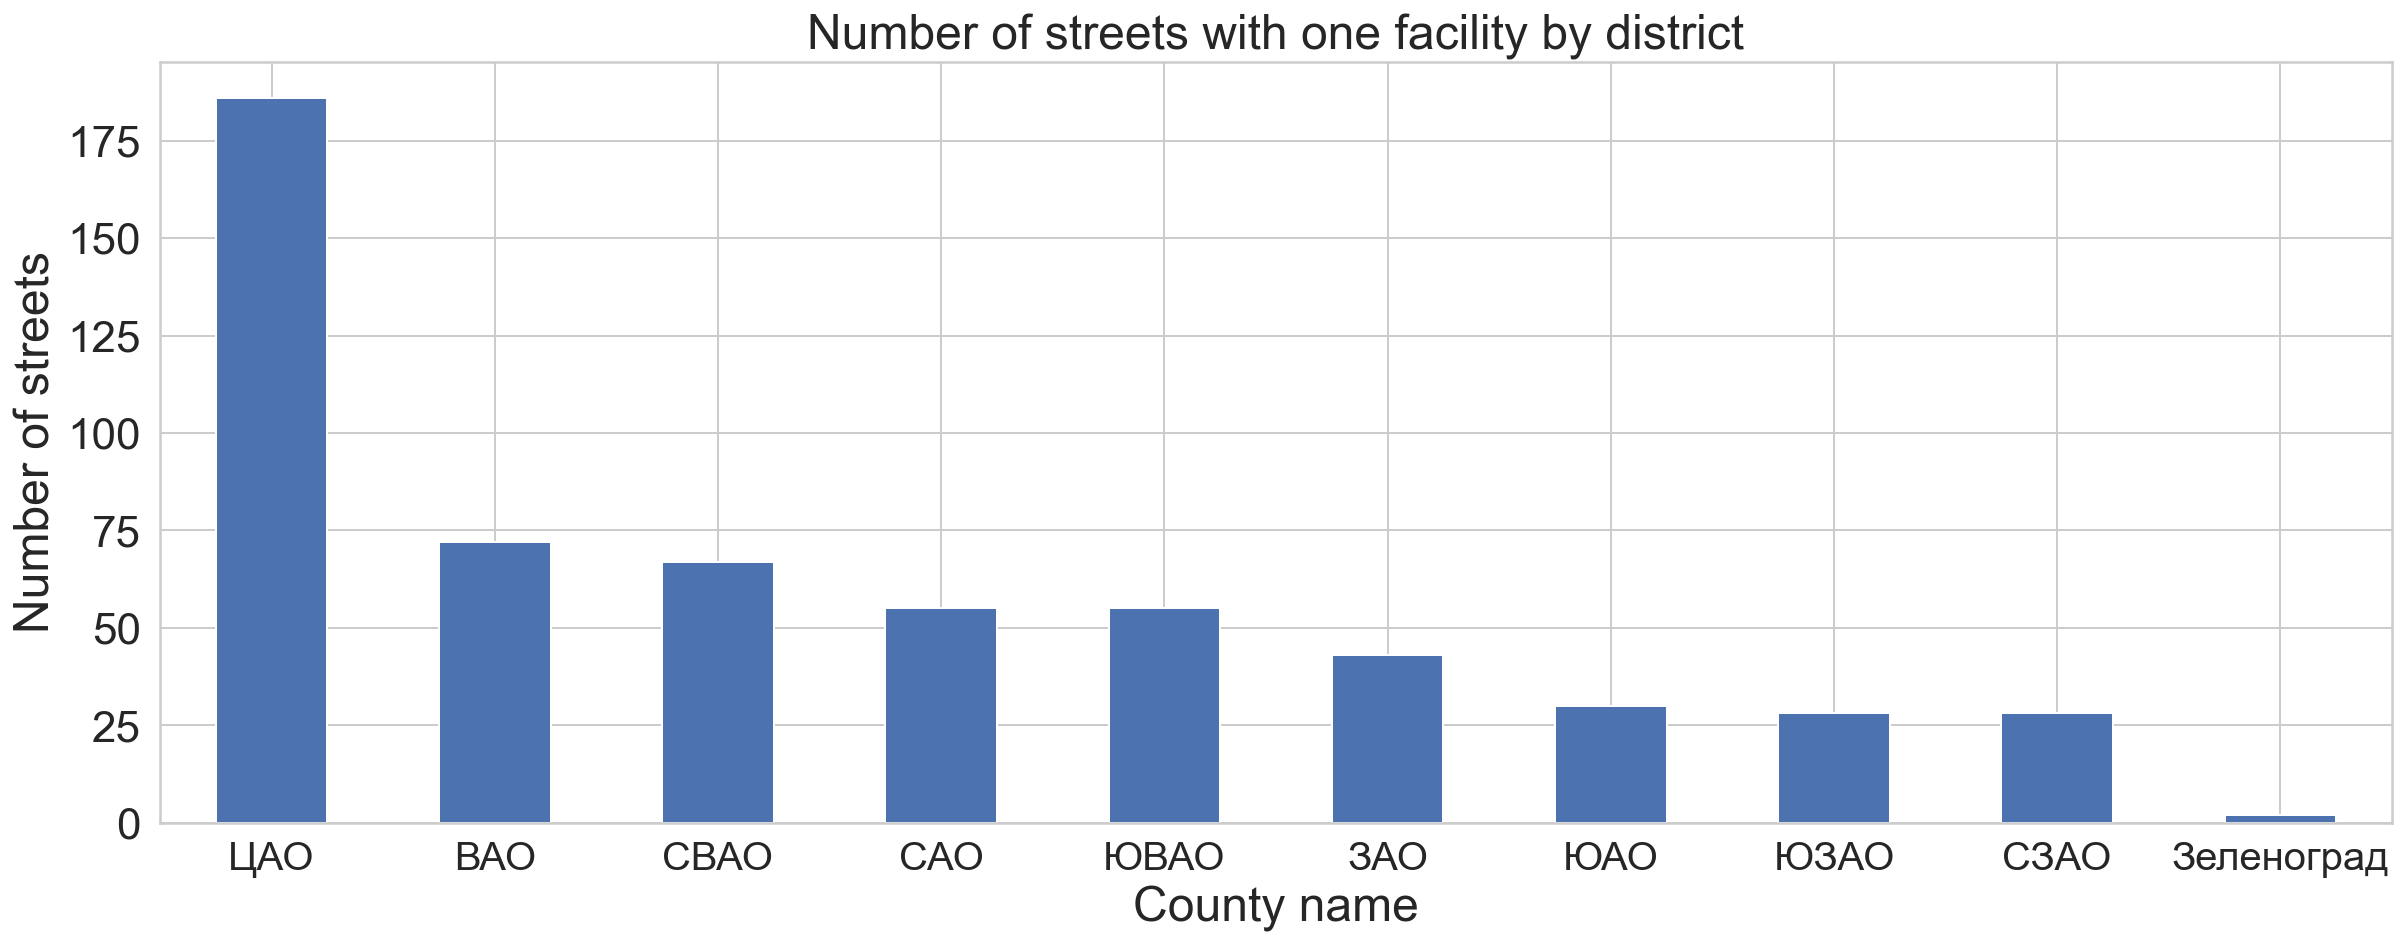

In [78]:
street_1object_merged.okrug.value_counts().plot(kind='bar')

plt.ylabel('Number of streets')
plt.xlabel('County name')
plt.title('Number of streets with one facility by district')
plt.tick_params(axis='x', labelsize=20)
plt.xticks(rotation=0);

After filtering the data, 566 streets with one catering facility were found. For 27 streets (4.55%) the table does not contain data on districts and districts. To identify them, manual data filling is required. They were removed in this study. The actual number of streets with one facility may be higher after filling in the missing data.

The most common streets are found in such districts as Tagansky, Khamovniki and Basmanny (27, 26 and 25 streets respectively). Central Administrative District is the most common district (185 streets with one catering facility).

# 3. General conclusion

**Cafes** have the largest share among types of catering facility - **39.7%.

19.32% of facilities are **network**. Cafes, fast food outlets and restaurants dominate among chain facilities (47%, 26.7% and 18.3% respectively). Canteens rank last (only 0.02%).

Network facilities are characterized by few establishments with a large number of seats.

The largest number of seats has **dining rooms** - 130.25. Next are restaurants (96.83), buffets (51.12), bars (43.49) and cafes (39.71). The mean and median for all sites are 59.55 and 40 seats, respectively.

**The top 10 streets** with the largest number of catering facilities are located in 37 districts, most often in **South-West Administrative District** and South Administrative District, and less often in Central Administrative District of Moscow. The number of facilities on one street ranges from **110 to 204**.

**There is virtually **no difference in the number of seats** in the top 10 streets with the highest number of facilities and, in general, across all streets.

The survey found **566 streets** where only **one food service facility** is located. As a rule, these are streets within **CAD**, in such districts as Tagansky, Khamovniki and Basmanny (27, 26 and 25 streets respectively).

The most popular type of establishment, the most demanded among customers, is a **cafe with almost 40 seats**. The top 10 streets with the most catering facilities are likely to have the highest footfall, but also the most competition amongst establishments. Therefore, special care should be taken when considering locations in these areas as there is a high risk of not being able to compete with insufficient economic calculations. Among the potential locations there may be streets with one catering facility. Most often they are located in the Central Administrative District of Moscow. Minimal competition, but there is a risk of insufficient pedestrian traffic. These recommendations apply to a standard cafe.

Now let's take into account that it is planned to open a cafe where the customers will be served by robots. In this case, the opening of such a cafe on the most passable streets will be appropriate. This format of the institution will definitely be original and will not have similar competitors.